<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/sales_forecast_str_csc_day_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing New Libraries**

In [1]:
!pip install python-weather
!pip install meteostat
!pip install geopandas
!pip install geopy
!pip install pgeocode
!pip install pyowm
!pip install wwo-hist
!pip install openweathermap_requests
!pip install holidays
!pip install shap
!pip install optuna
!pip install hyperopt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for python-weather: filename=python_weather-0.4.3-py3-none-any.whl size=10343 sha256=2f673e605b98335d09224ba6ae12f6be8da8c143aa3ffe347923e51754cd05e6
  Stored in directory: /root/.cache/pip/wheels/b7/7a/c7/f84adc5c4e3f87615013b2987856750dc521729dc43d656e3d
Successfully built python-weather
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 16.7 MB 40.7 MB/s 
     |████████████████████████████████| 6.3 MB 45.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: http

# **Importing Libraries**

In [2]:
from scipy.stats import norm
import lightgbm as lgb
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from geopy.geocoders import Nominatim
import xgboost
print(xgboost.__version__)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pgeocode
import numpy as np
import pyowm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from wwo_hist import retrieve_hist_data
from openweathermap_requests import OpenWeatherMapRequests
from statsmodels.formula.api import ols
import statsmodels.api as sm
import holidays
import datetime
from datetime import date
from datetime import timedelta
import xgboost as xgb
from xgboost import plot_importance, plot_tree

0.90


# **Holiday**

In [3]:
class holiday:
    """
    This class lists both Federal and State holidays for current year 
    and next 9 years.
    """
    def __init__(self):
        """
        This initialization method obtains current year and lists all USA states.
        """
        self.current_year = date.today().year
        self.states_list = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 
                             'CO', 'CT', 'DC', 'DE', 'FL', 
                             'GA', 'HI', 'IA', 'ID', 'IL', 
                             'IN', 'KS', 'KY', 'LA', 'MA', 
                             'MD', 'ME', 'MI', 'MN', 'MO', 
                             'MS', 'MT', 'NC', 'ND', 'NE', 
                             'NH', 'NJ', 'NM', 'NV', 'NY', 
                             'OH', 'OK', 'OR', 'PA', 'RI', 
                             'SC', 'SD', 'TN', 'TX', 'UT', 
                             'VA', 'VT', 'WA', 'WI', 'WV', 'WY'
                            ]
        self.holiday_date_list = []
        self.holiday_details_list = []
        self.df_holiday = pd.DataFrame()
    
    def collect_federal_holiday_list(self):
        """
        This method lists all federal holidays along with observed ones
        in USA in a given year.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            # Print all the holidays in United States in the year 
            for federal_holiday_val in holidays.UnitedStates(years = year, observed = True).items():
                print(f"Federal Holiday :: {str(federal_holiday_val[0])} :: {federal_holiday_val[1]}")
                self.holiday_date_list.append(federal_holiday_val[0])
                self.holiday_details_list.append(('FE', 
                                                  year, 
                                                  str(federal_holiday_val[0]), 
                                                  federal_holiday_val[1]
                                                 )
                                                )

    def collect_state_holiday_list(self):
        """
        This method lists all state holidays along with observed ones
        in USA in a given year which are not federal holidays.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            for state in self.states_list:
                for state_holiday_val in holidays.UnitedStates(years = year, observed = True, subdiv = state).items():
                    if state_holiday_val[0] not in self.holiday_date_list:
                        print(f"State {state} Holiday :: {str(state_holiday_val[0])} :: {state_holiday_val[1]}")
                        self.holiday_date_list.append(state_holiday_val[0])
                        self.holiday_details_list.append((state, 
                                                          year, 
                                                          str(state_holiday_val[0]), 
                                                          state_holiday_val[1]
                                                          )
                                                        )
    
    def get_holiday(self, year):
        """
        This method provides the list of federal and state holidays 
        in a given year. It also writes the data in a csv file with name format 
        as holiday_list_<<4 digit year, comes from input parameter>>.csv.
        """
        yearly_holiday_list = []
        print(f"List of holidays in {year}:-")
        #print(self.holiday_details_list)
        for holiday_val in self.holiday_details_list:
            if holiday_val[1] == year:
                print(f"{holiday_val[0]} :: {holiday_val[1]} :: {holiday_val[2]} :: {holiday_val[3]}")
                yearly_holiday_list.append(holiday_val)
        self.df_holiday = pd.DataFrame(yearly_holiday_list, columns =['level', 'year', 'date', 'holiday_name'])
        #print(self.df_holiday)
        self.df_holiday.to_csv('holiday_list_' + str(year) + '.csv', index = False)
        return self.df_holiday
    
    def __repr__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}")

    def __str__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}") 

current_year = date.today().year
hdy = holiday()
help(holiday)
hdy.collect_federal_holiday_list()
hdy.collect_state_holiday_list()

current_year_hdy = hdy.get_holiday(current_year)
one_year_ago_year_hdy = hdy.get_holiday(current_year-1)
two_year_ago_year_hdy = hdy.get_holiday(current_year-2)
three_year_ago_year_hdy = hdy.get_holiday(current_year-3)
df_holiday_combined = pd.concat([current_year_hdy, one_year_ago_year_hdy, two_year_ago_year_hdy])

Help on class holiday in module __main__:

class holiday(builtins.object)
 |  This class lists both Federal and State holidays for current year 
 |  and next 9 years.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      This initialization method obtains current year and lists all USA states.
 |  
 |  __repr__(self)
 |      This method prints states list and current year.
 |  
 |  __str__(self)
 |      This method prints states list and current year.
 |  
 |  collect_federal_holiday_list(self)
 |      This method lists all federal holidays along with observed ones
 |      in USA in a given year.
 |  
 |  collect_state_holiday_list(self)
 |      This method lists all state holidays along with observed ones
 |      in USA in a given year which are not federal holidays.
 |  
 |  get_holiday(self, year)
 |      This method provides the list of federal and state holidays 
 |      in a given year. It also writes the data in a csv file with name format 
 |      as holiday_list_<<4 d

In [4]:
df_holiday_combined

level  year        date                          holiday_name
0     FE  2022  2022-01-01                        New Year's Day
1     FE  2022  2022-01-17            Martin Luther King Jr. Day
2     FE  2022  2022-02-21                 Washington's Birthday
3     FE  2022  2022-05-30                          Memorial Day
4     FE  2022  2022-06-19  Juneteenth National Independence Day
..   ...   ...         ...                                   ...
44    VA  2020  2020-01-17                       Lee Jackson Day
45    VT  2020  2020-03-03                      Town Meeting Day
46    VT  2020  2020-08-16                 Bennington Battle Day
47    VT  2020  2020-08-17      Bennington Battle Day (Observed)
48    WV  2020  2020-06-20                     West Virginia Day

[152 rows x 4 columns]

# **Setting up the Period**

In [5]:
# Set time period
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 31)

# **Getting Weather Data at Day and Zipcode Level**

In [6]:
df_weather = pd.read_csv('result_3zip_weather.csv')
df_weather.columns = [col.lower() for col in df_weather.columns]
df_weather['zip5'] = df_weather['zip5'].astype(str)
df_weather['zip5'] = df_weather['zip5'].apply(lambda x : x.zfill(5))
df_weather.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0  01749  2019-03-20                  50.8                 24.3       1   
1  02747  2019-03-20                  52.2                 21.7       1   
2  05673  2019-03-20                  44.9                 16.9       3   
3  01749  2019-03-21                  51.5                 32.2      26   
4  02747  2019-03-21                  53.1                 31.7      12   

   precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                 0               6      30          LOW            14.9   
1                 0               6      22          LOW            17.9   
2                 0               6       0          LOW            11.9   
3                66               6      30      MINIMAL            14.9   
4                66               6      30      MINIMAL            32.8   

   humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
0            30           18.8            0.0            0.0   
1            29           19.2            0.0            0.0   
2            47           23.1            0.0            0.0   
3            41           26.5            0.5            0.0   
4            38           26.1            0.5            0.0   

   comfort_index_amt  precipitation_probability_pct feed_cd  \
0               44.8                              3     OTH   
1               46.1                              0     OTH   
2               37.1                              6     OTH   
3               46.1                             93     OTH   
4               46.1                             99     OTH   

                  last_update_ts  
0  2019-03-20 07:31:11.000 -0600  
1  2019-03-20 07:31:11.000 -0600  
2  2019-03-20 07:31:11.000 -0600  
3  2019-03-21 07:31:31.000 -0600  
4  2019-03-21 07:31:31.000 -0600

# **Loading 5 digit zip codes for Shaws stores.**

In [7]:
df_zip = pd.read_csv('zipcode.txt')
df_zip.columns = [col.lower() for col in df_zip.columns]
df_zip = df_zip.drop_duplicates()
df_zip['zipcode'] = df_zip['zipcode'].apply(lambda x : x.replace("'",""))
df_zip.head()

zipcode
0   05602
1   02067
2   04530
3   02199
4   02126

In [8]:
df_zip[df_zip.zipcode == '03458']

zipcode
148   03458

# **Loading Shaw's Stores Store-Zipcode Combination Data**

In [9]:
df_str_zip = pd.read_csv('store_zipcode.txt')
df_str_zip['zip_code'] = df_str_zip['zip_code'].astype(str)
df_str_zip['zip_code'] =  df_str_zip['zip_code'].apply(lambda x : x.zfill(5))
df_str_zip.columns = ['store_id', 'zip_code']
df_str_zip.head()

store_id zip_code
0       121    05602
1       418    02067
2       553    04530
3       602    02199
4       604    02126

In [10]:
df_str_zip[df_str_zip.zip_code == '03458']

store_id zip_code
148      4694    03458

# **Combining weather and zip code data together.**

In [11]:
df_weather = pd.merge(df_weather, df_str_zip, how = 'inner', left_on = 'zip5', right_on = 'zip_code')

In [12]:
df_weather.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 'last_update_ts',
       'store_id', 'zip_code'],
      dtype='object')

In [13]:
df_weather = df_weather [['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 
       'store_id']]
df_weather = df_weather[df_weather['zip5'].isin(['02747','05673','05764'])]

In [14]:
df_weather.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
Name: 1329, dtype: object

# **Getting historical min, max and avg temp weather data on a particular day and zipcode level.**

05602


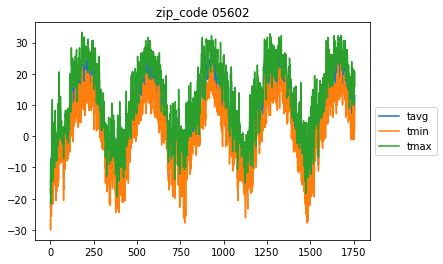

02067


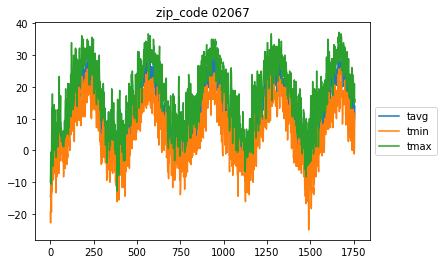

04530


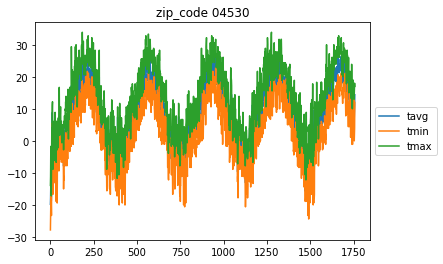

02199


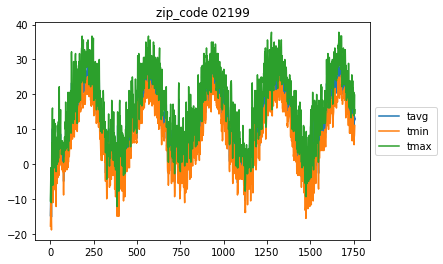

02126


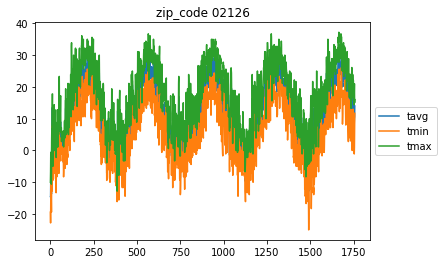

05446


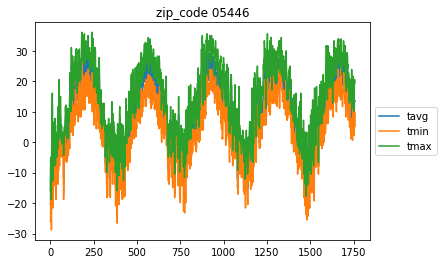

02747


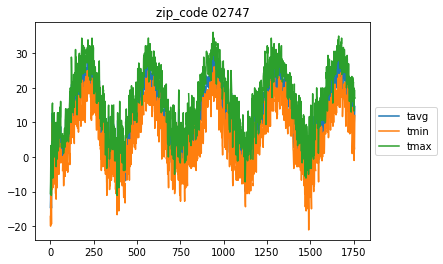

01757


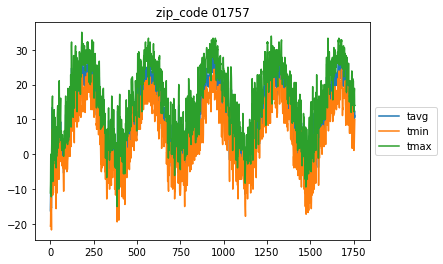

03087


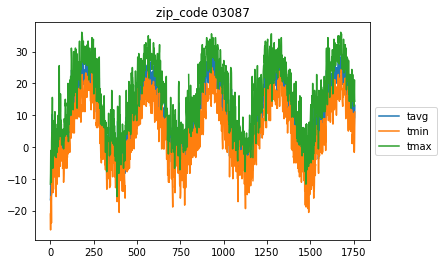

02341


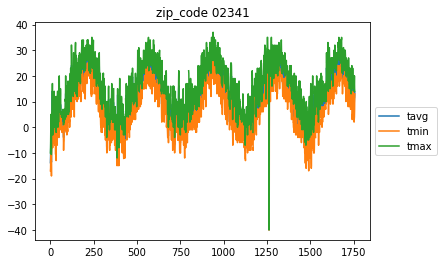

02720


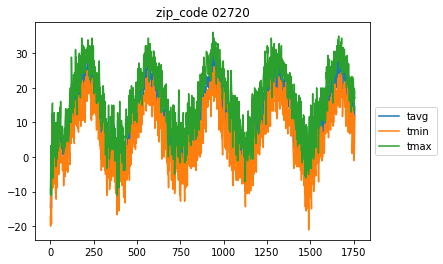

02052


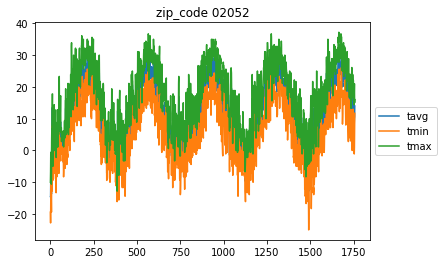

01721


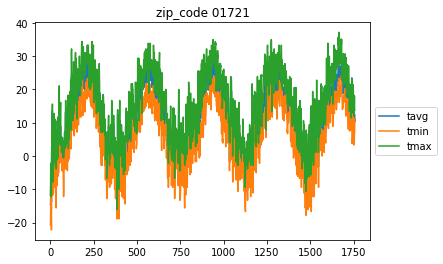

02453


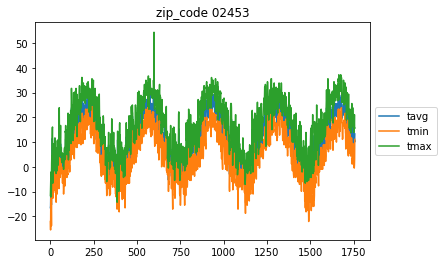

02025


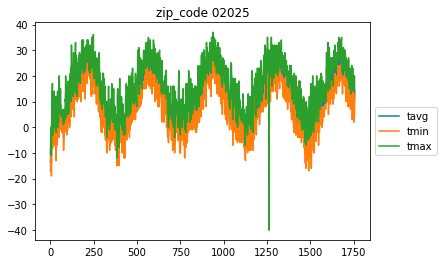

05495


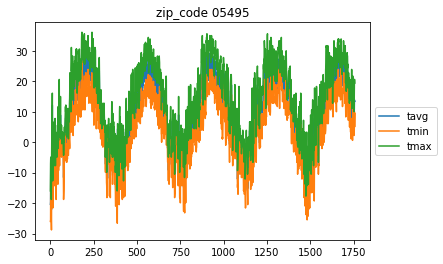

03785


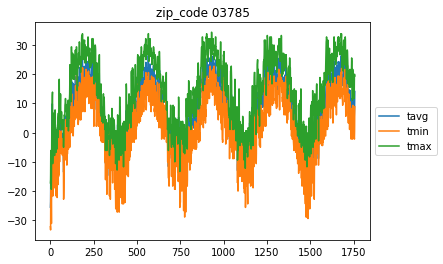

04210


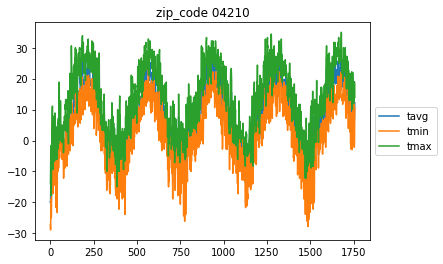

04330


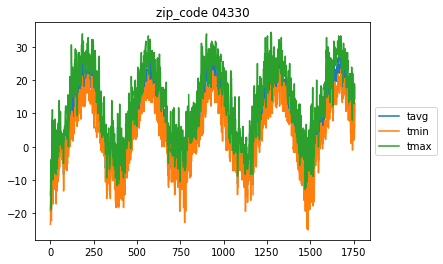

01776


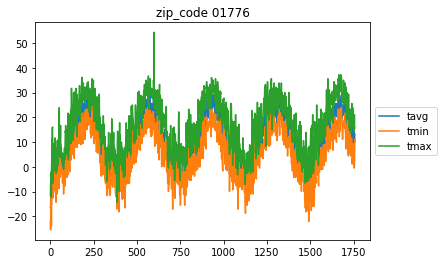

02169


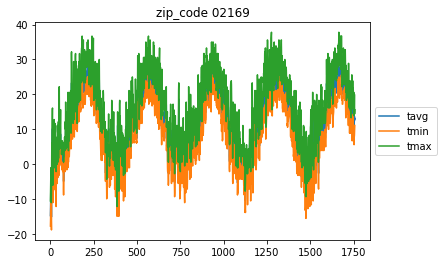

04072


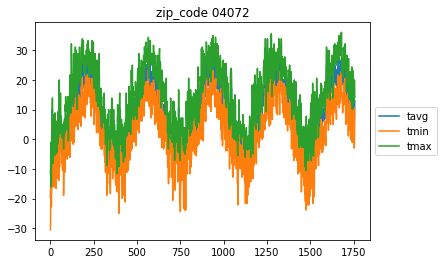

02189


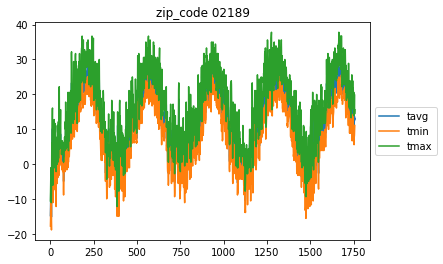

03038


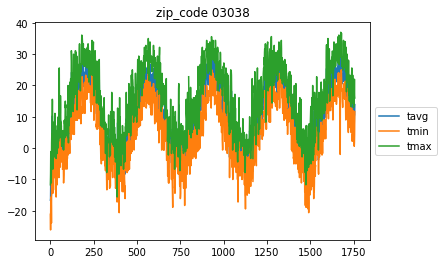

02460


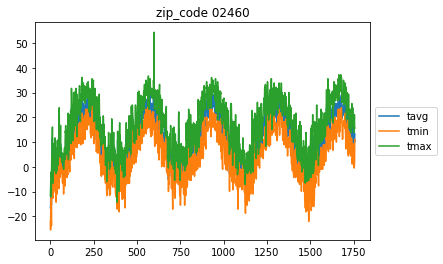

02038


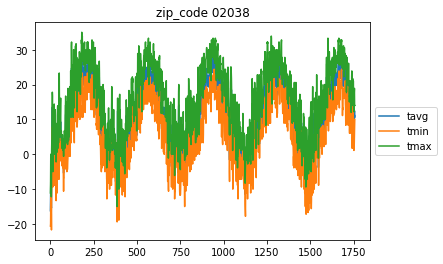

02215


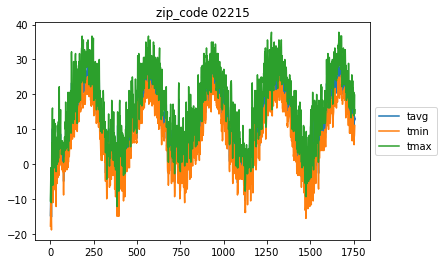

01915


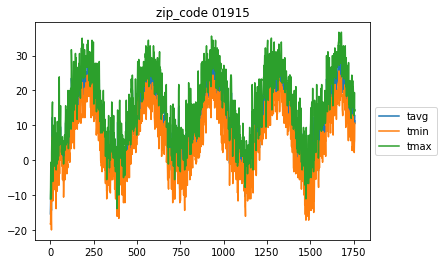

04105


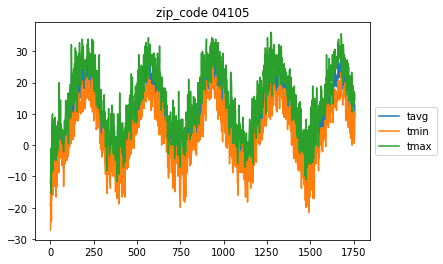

04605


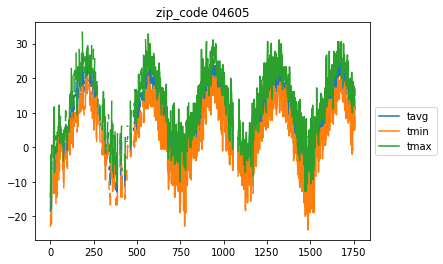

03060


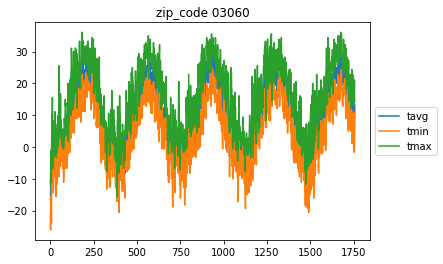

05403


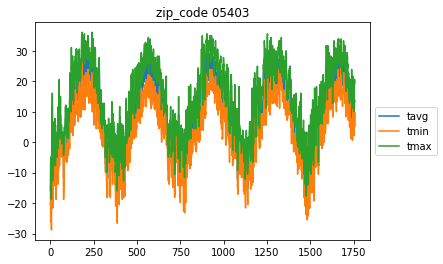

02140


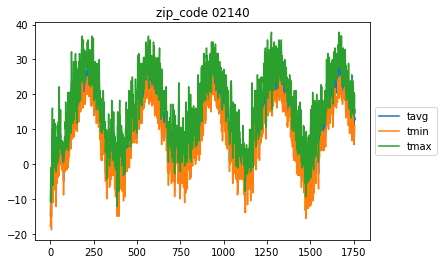

05363


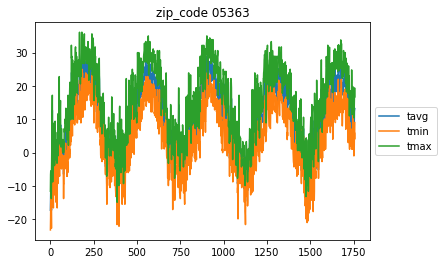

05673


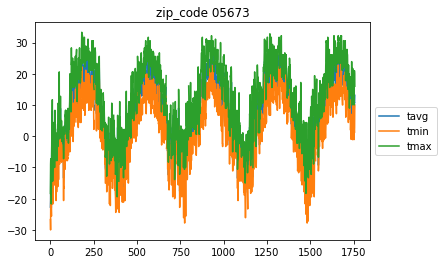

02026


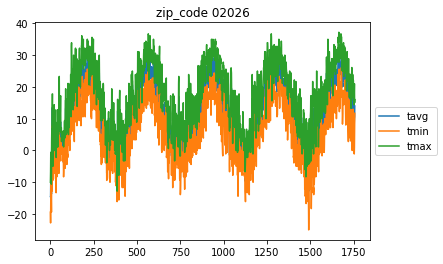

02021


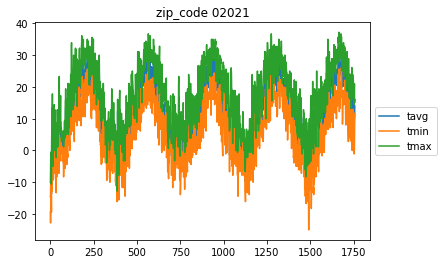

02048


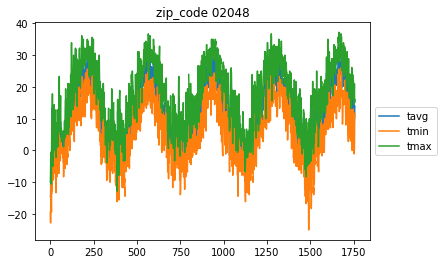

02339


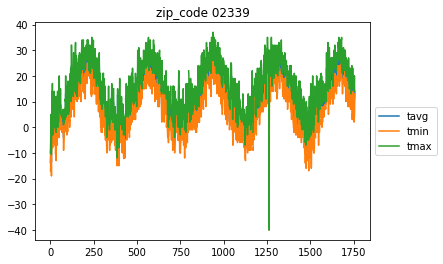

02886


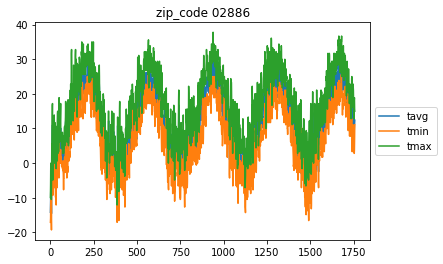

03053


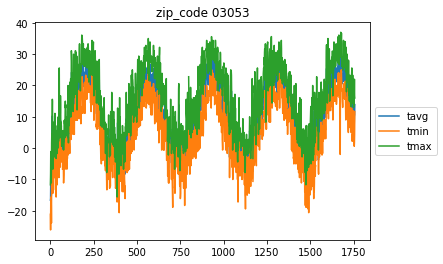

01803


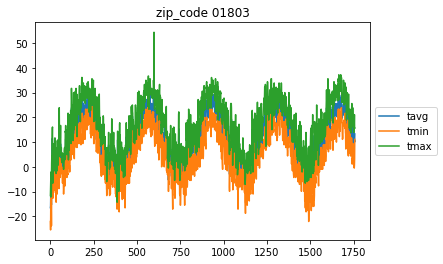

05060


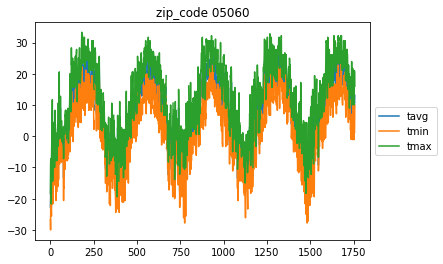

05255


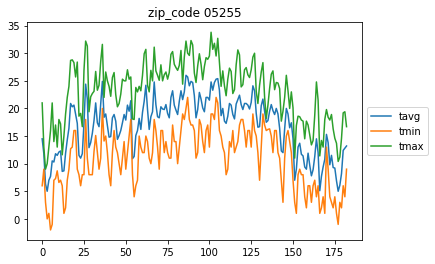

02536


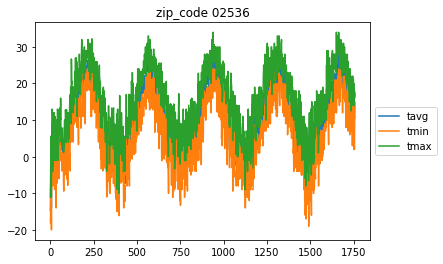

04032


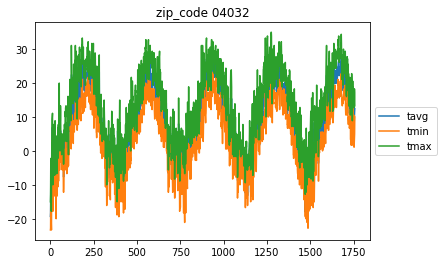

05829


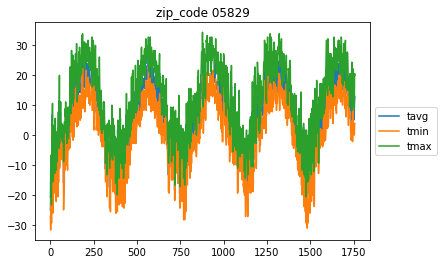

03885


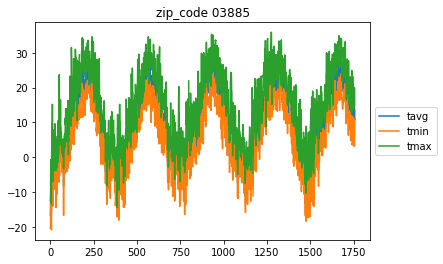

01603


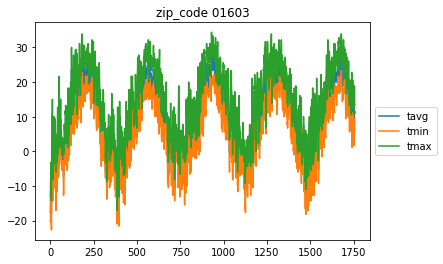

01605


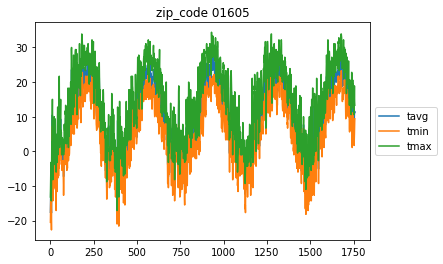

02920


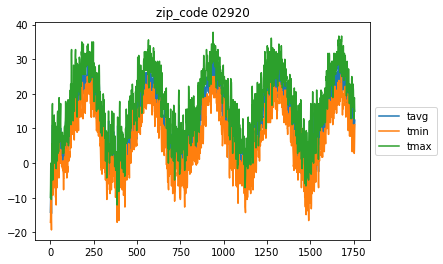

01450


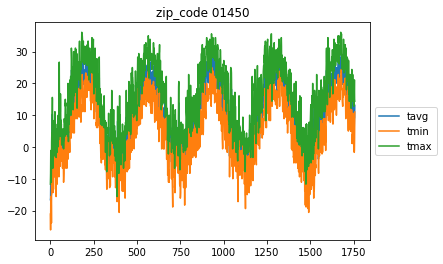

04011


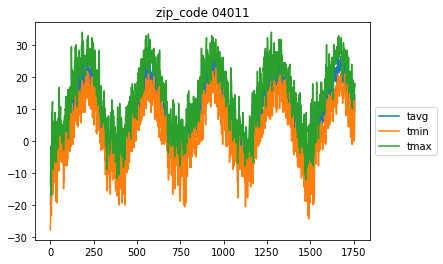

04426
02467


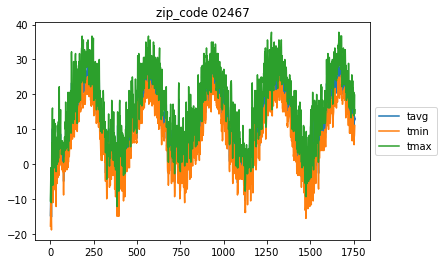

05676


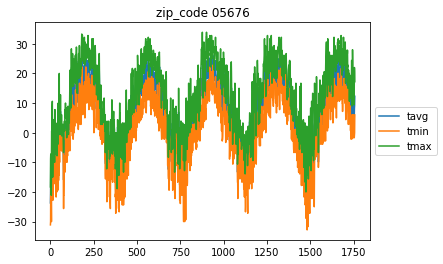

01510


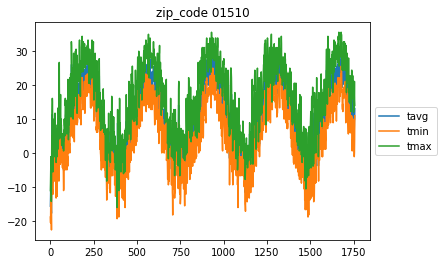

03054


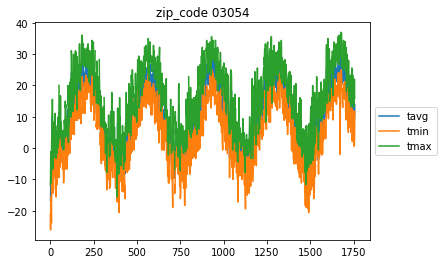

02653


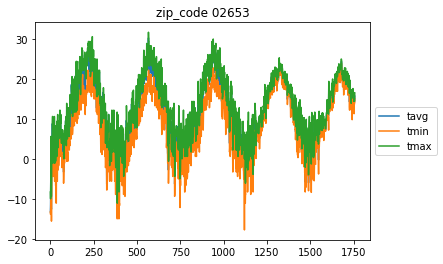

03301


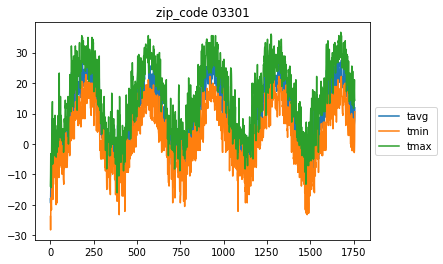

02128


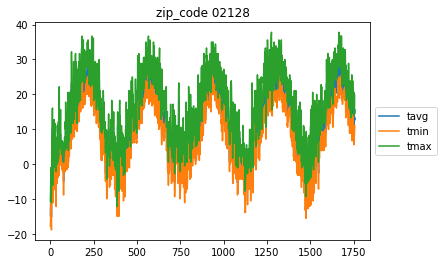

05753


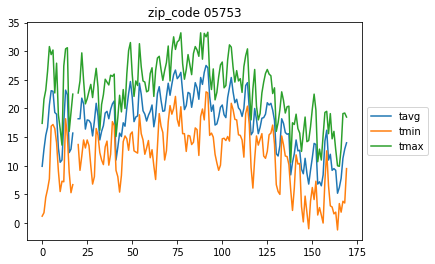

05764


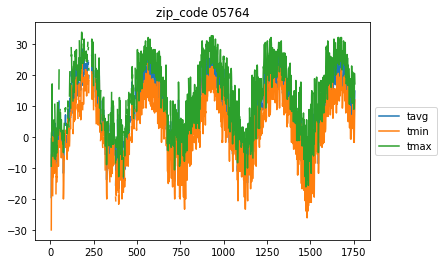

05743


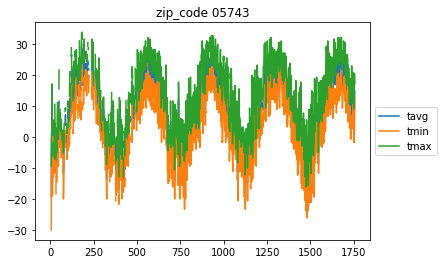

02349


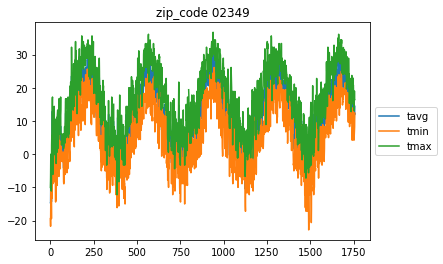

02184


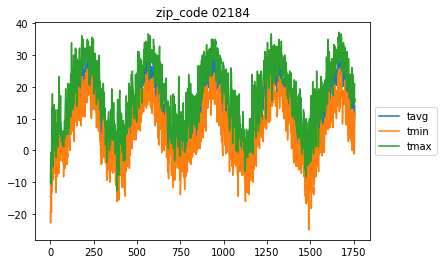

02760


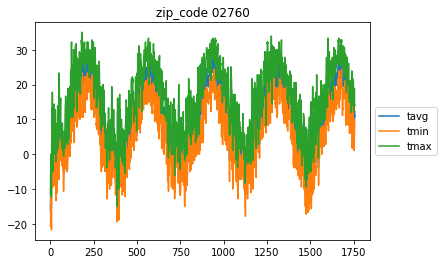

02368


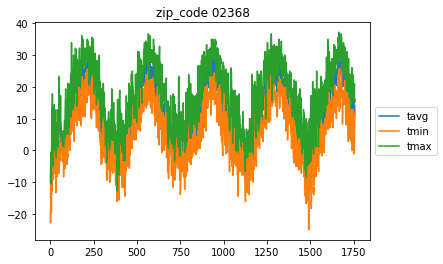

02767


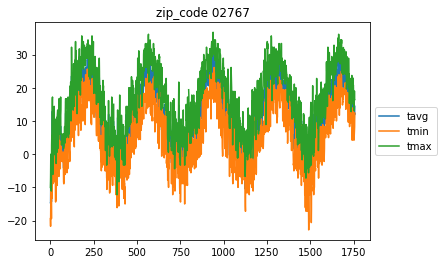

02301


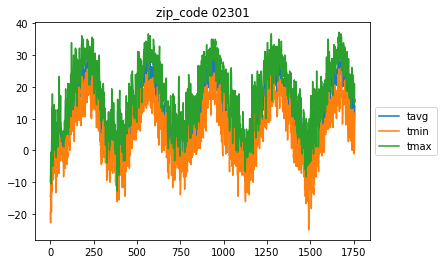

02053


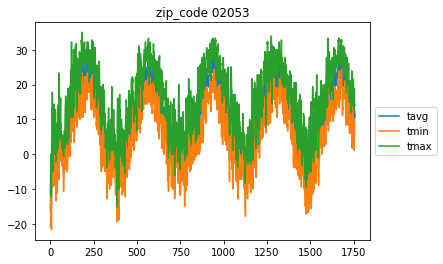

01588


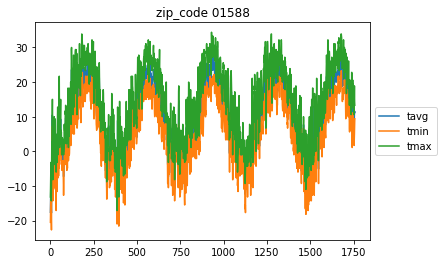

02806


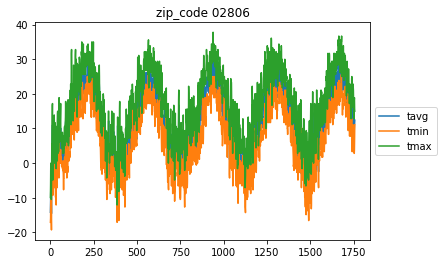

02842


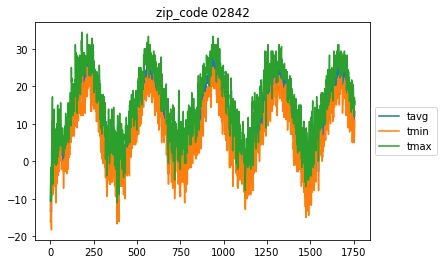

02601


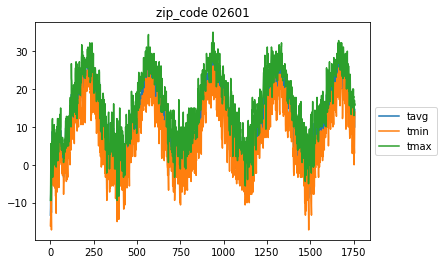

04578


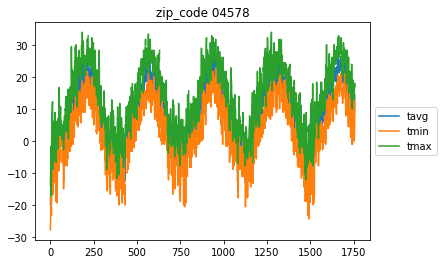

02330


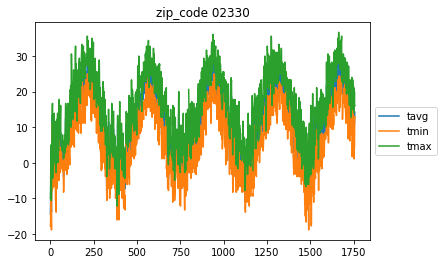

03220


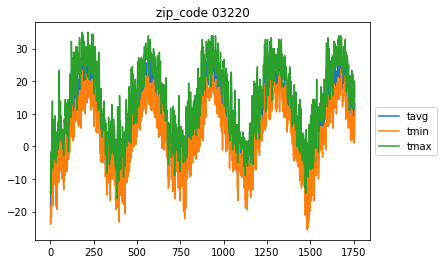

05672


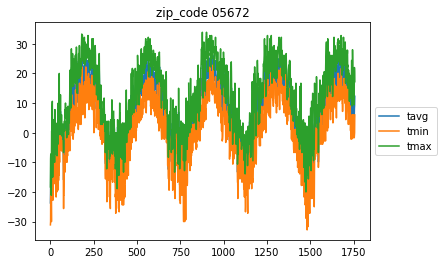

03818
02356


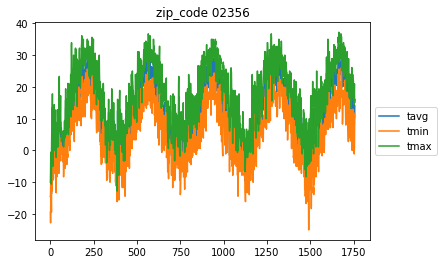

02879


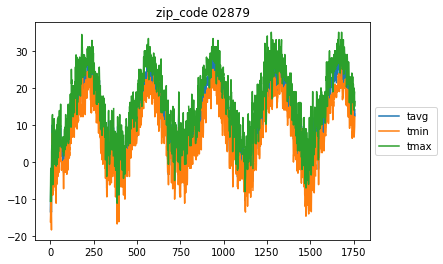

01545


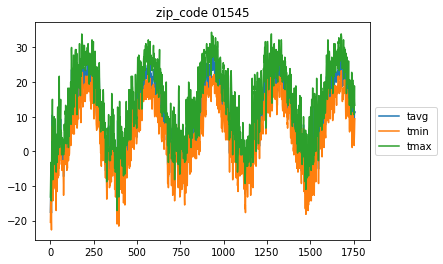

01566


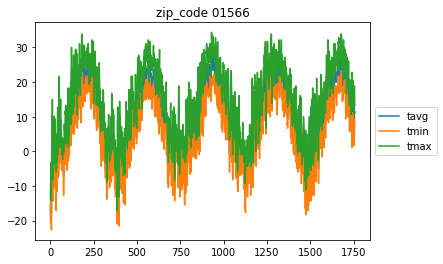

01960


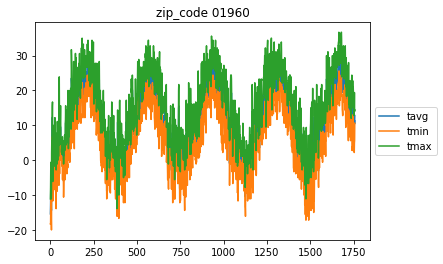

03820


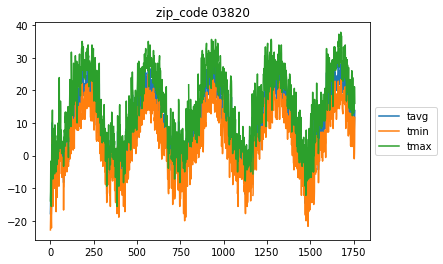

01950


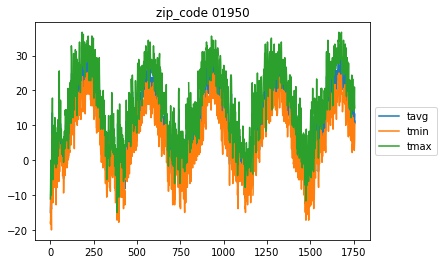

03055


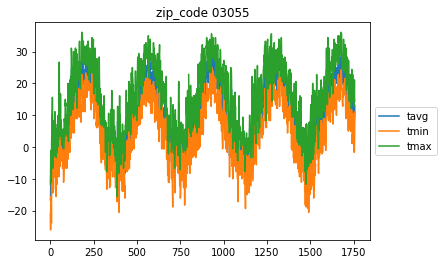

01970


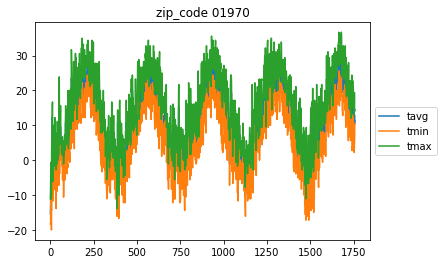

05149


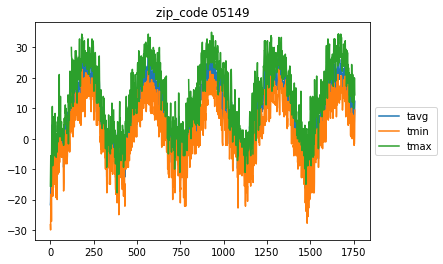

05156


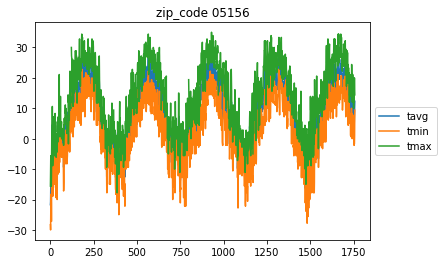

03584
05491


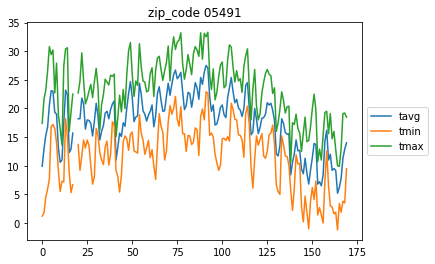

04062


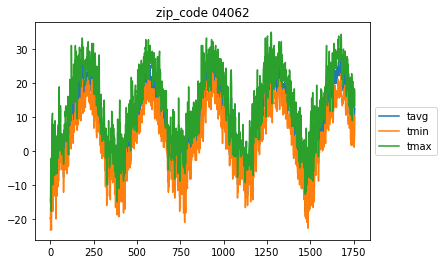

04103


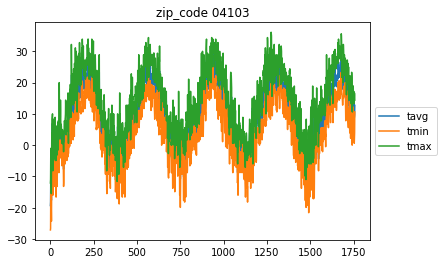

04074


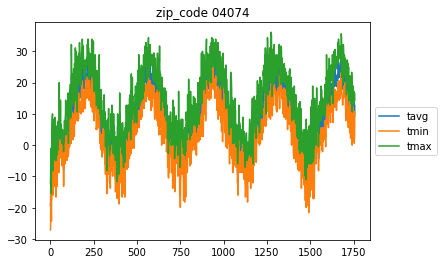

02138


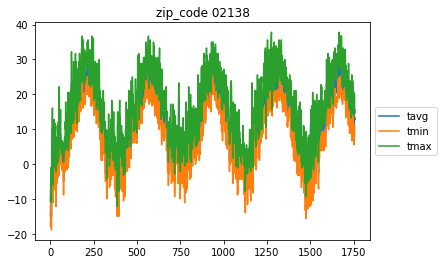

02452


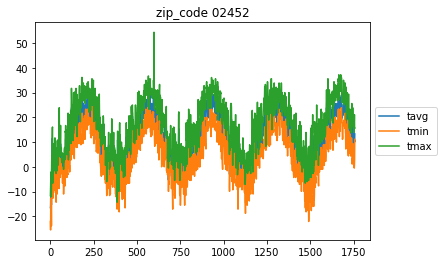

02145


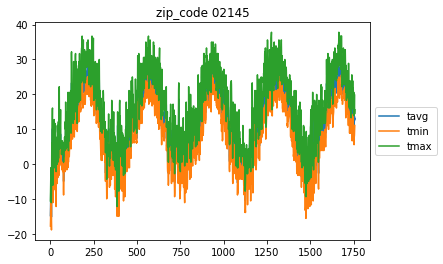

02136


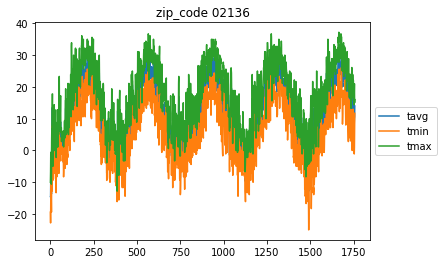

02478


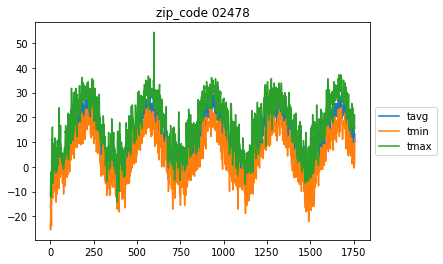

01775


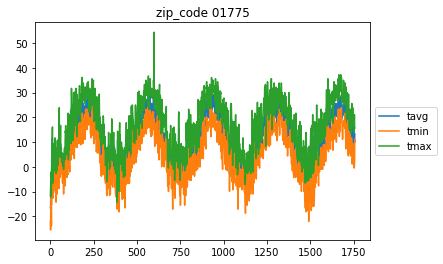

02360


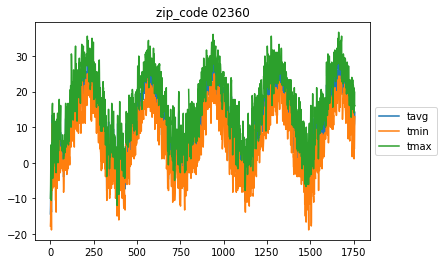

02050


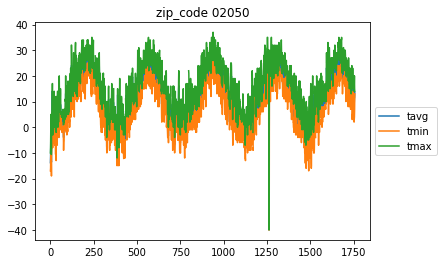

03561


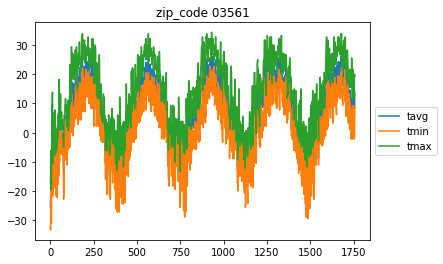

02571


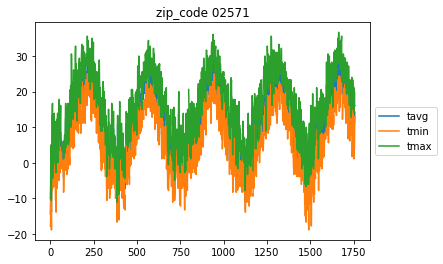

01749


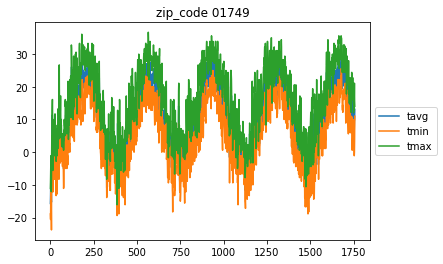

02915


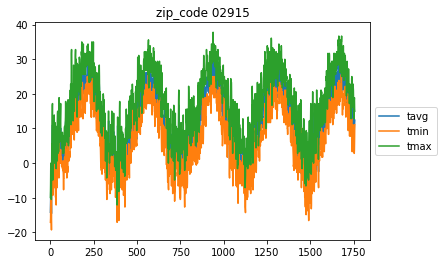

02176


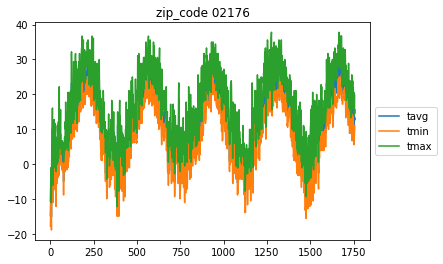

05443


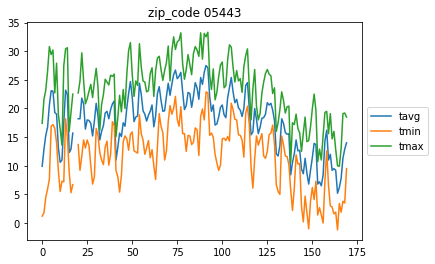

03608


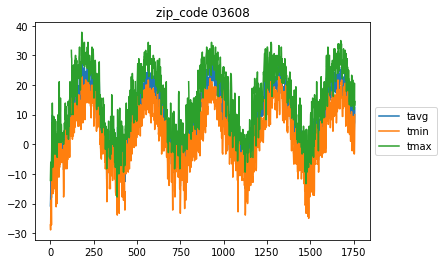

04106


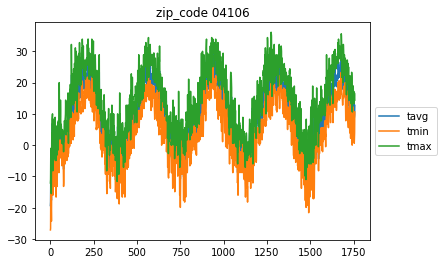

04841


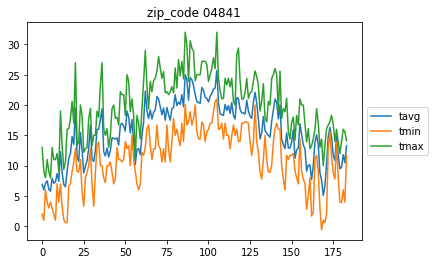

04901


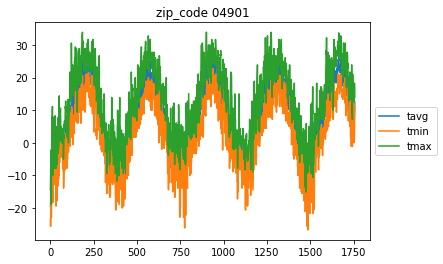

02445


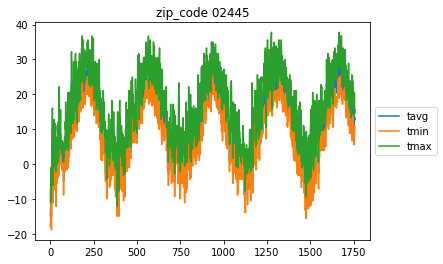

02062


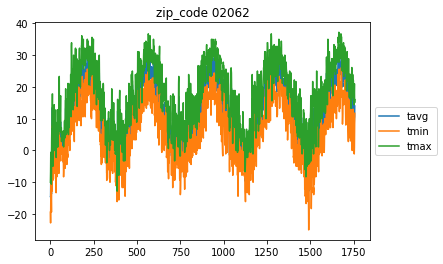

02132


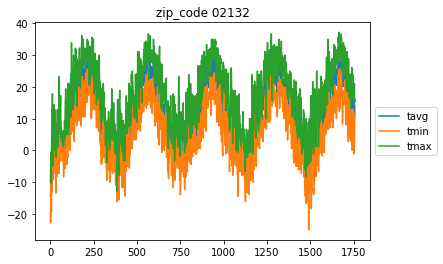

02143


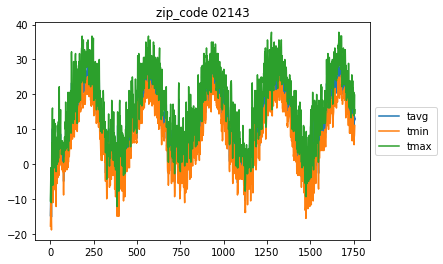

01930


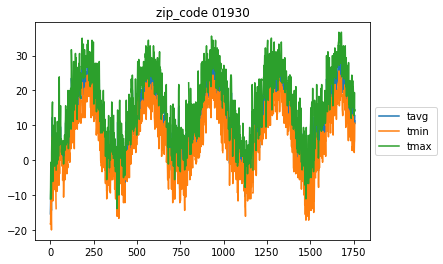

01880


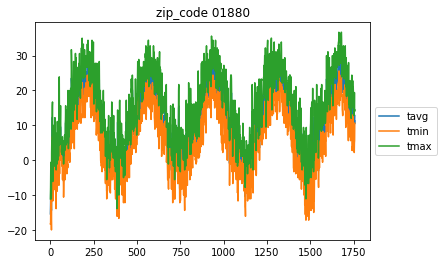

03865


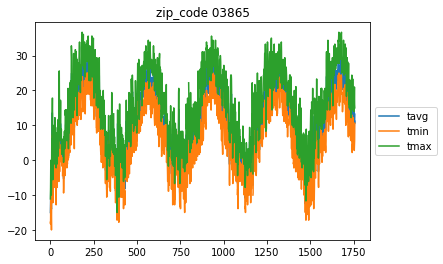

02914


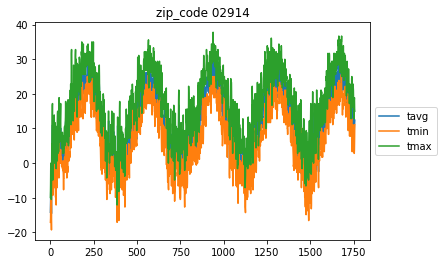

02664


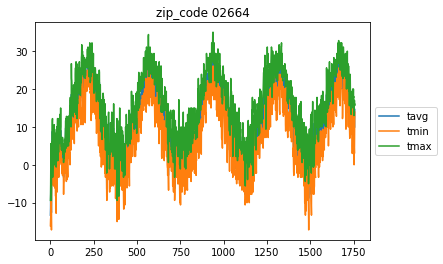

02114


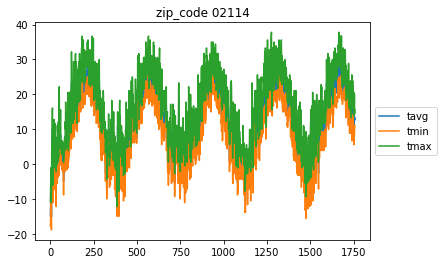

02302


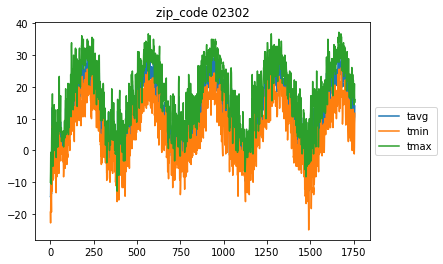

02904


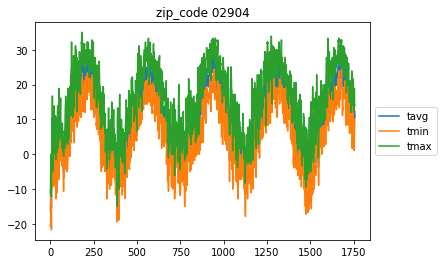

01501


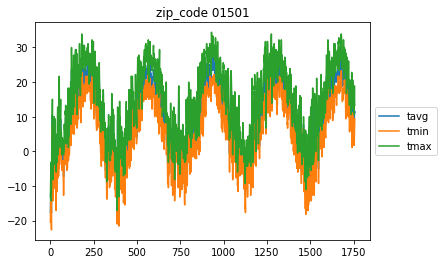

03106


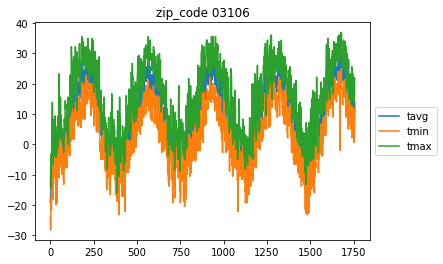

03862


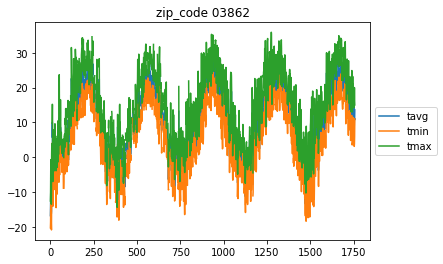

03244


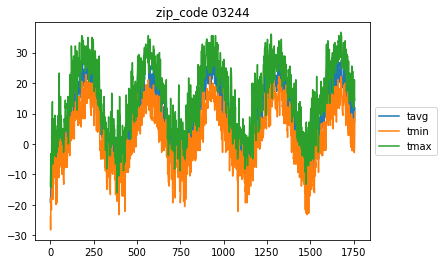

03773


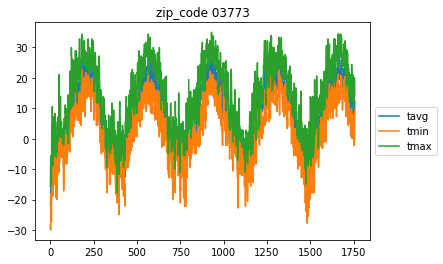

04102


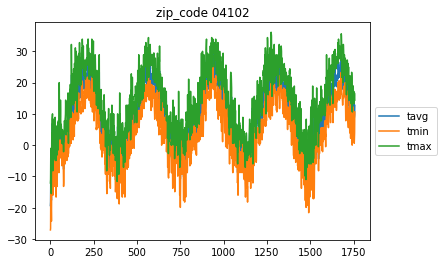

03784


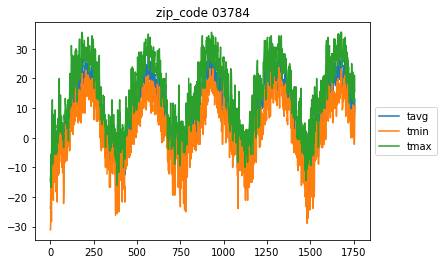

04401


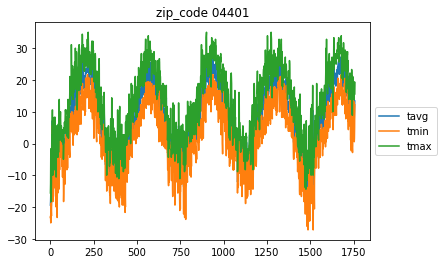

04240


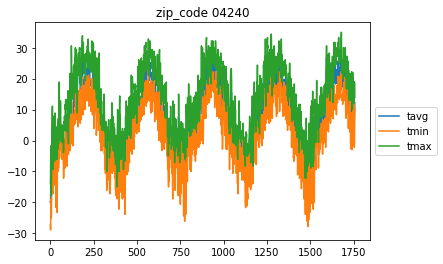

04073


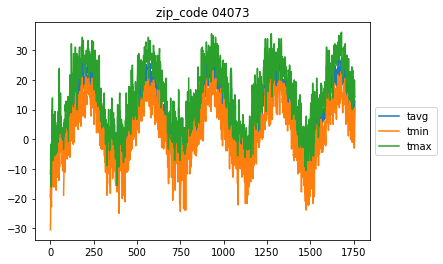

02466


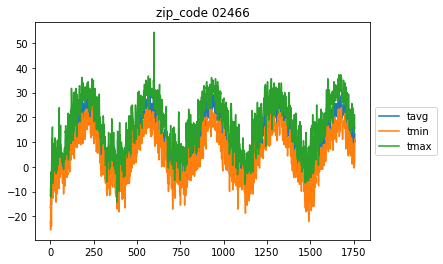

02135


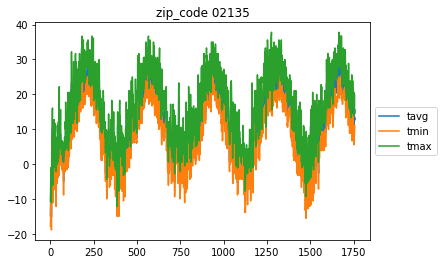

02125


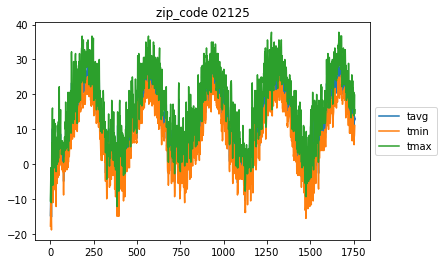

01938


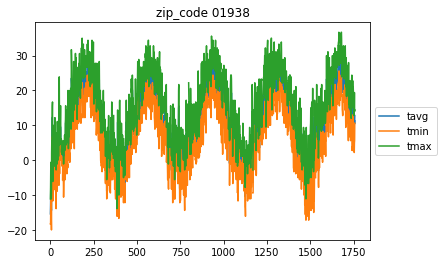

02646


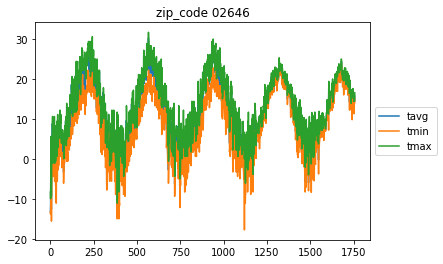

03458


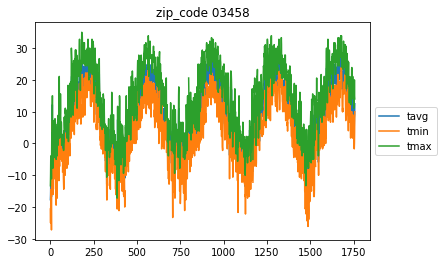

time  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2018-01-01 -22.7 -26.7 -18.3   NaN   NaN    NaN  10.3   NaN  1026.9   
1     2018-01-02 -20.6 -30.0  -8.9   NaN   NaN    NaN   6.4   NaN     NaN   
2     2018-01-03 -10.5 -13.9  -7.2   NaN   NaN    NaN  10.2   NaN  1022.1   
3     2018-01-04 -11.9 -15.0  -8.9   NaN   NaN    NaN  12.8   NaN     NaN   
4     2018-01-05 -18.9 -21.7 -11.1   NaN   NaN  315.0  21.6   NaN     NaN   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
1753  2022-10-20   5.9  -1.0  12.2   0.0   NaN  209.0  12.8   NaN  1012.7   
1754  2022-10-21   5.6  -1.7  15.0   0.0   NaN  225.0   6.6   NaN  1019.8   
1755  2022-10-22   8.2   0.0  20.0   0.0   NaN  208.0   7.3   NaN  1024.8   
1756  2022-10-23   9.0   3.3  15.0   1.8   NaN   16.0   3.4   NaN  1027.8   
1757  2022-10-24  12.5  10.0  14.0   1.5   NaN   42.0   6.0   NaN  1024.7   

      tsun      lat    long    zip  
0      NaN  44.2641 -72.577  05602  
1      NaN  44.2641 -72.577  05602  
2      NaN  44.2641 -72.577  05602  
3      NaN  44.2641 -72.577  05602  
4      NaN  44.2641 -72.577  05602  
...    ...      ...     ...    ...  
1753   NaN  42.8856 -71.947  03458  
1754   NaN  42.8856 -71.947  03458  
1755   NaN  42.8856 -71.947  03458  
1756   NaN  42.8856 -71.947  03458  
1757   NaN  42.8856 -71.947  03458  

[236447 rows x 14 columns]

In [15]:
us_zip = pgeocode.Nominatim('us')
temp_df = pd.DataFrame()
addr_weather_df = pd.DataFrame()
lat_long_list = []
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 24)
err_list = []
for zip in df_zip['zipcode'].values.tolist():
    print(zip)
    lat, long = us_zip.query_postal_code(zip)[9:11][0], us_zip.query_postal_code(zip)[9:11][1]
    lat_long_list.append((lat, long))
    location = Point(lat, long)
    data = Daily(location, start, end)
    data = data.fetch()
    if len(data) == 0:
        err_list.append(zip)
        continue
    data.reset_index(inplace = True)
    data['lat'] = lat
    data['long'] = long
    data['zip'] = zip
    addr_weather_df = addr_weather_df.append(data)
    data.plot(y=['tavg', 'tmin', 'tmax'])
    plt.title('zip_code ' + zip)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
    
addr_weather_df['time'] = addr_weather_df['time'].apply(lambda x : x.strftime("%Y-%m-%d"))
addr_weather_df

# **Error List**

In [16]:
err_list

['04426', '03818', '03584']

Combining weather with weather at a zipcode.

# **Combining Weather Data along with Historical Weather Details**

In [17]:
df_weather_consolidated = pd.merge(df_weather, addr_weather_df, how = 'inner', left_on = ['zip5', 'day_dt'], right_on = ['zip', 'time'])
df_weather_consolidated

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0     02747  2019-03-20                  52.2                 21.7       1   
1     02747  2019-03-21                  53.1                 31.7      12   
2     02747  2019-03-22                  45.1                 38.6      18   
3     02747  2019-03-23                  52.2                 32.7      32   
4     02747  2019-03-24                  59.1                 25.7       3   
...     ...         ...                   ...                  ...     ...   
2625  05673  2022-10-20                  53.7                 34.2      17   
2626  05673  2022-10-21                  55.3                 29.9       3   
2627  05673  2022-10-22                  62.3                 35.9       1   
2628  05673  2022-10-23                  62.1                 35.9       3   
2629  05673  2022-10-24                  57.1                 41.6      18   

      precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                    0               6      22          LOW            17.9   
1                   66               6      30      MINIMAL            32.8   
2                    7               6      32      MINIMAL            29.8   
3                    0               6      30          LOW            35.8   
4                    0               7      30          LOW            32.8   
...                ...             ...     ...          ...             ...   
2625                 0               6       0      MINIMAL            29.8   
2626                 0               6       0      MINIMAL            17.9   
2627                 0               8      20      MINIMAL            14.9   
2628                65               6      20      MINIMAL             3.0   
2629                 5               6      32      MINIMAL             3.0   

      ...  prcp  snow   wdir  wspd  wpgt    pres tsun      lat     long    zip  
0     ...   0.0   NaN    NaN   9.9   NaN  1028.8  NaN  41.6338 -70.9958  02747  
1     ...   0.0   NaN  123.0  13.2   NaN  1020.7  NaN  41.6338 -70.9958  02747  
2     ...   NaN   NaN  333.0  23.2   NaN   992.2  NaN  41.6338 -70.9958  02747  
3     ...   NaN   NaN  283.0  31.6   NaN  1001.4  NaN  41.6338 -70.9958  02747  
4     ...   0.0   NaN    NaN  16.6   NaN  1016.7  NaN  41.6338 -70.9958  02747  
...   ...   ...   ...    ...   ...   ...     ...  ...      ...      ...    ...  
2625  ...   0.0   NaN  197.0  11.8   NaN  1011.7  NaN  44.1889 -72.8283  05673  
2626  ...   0.0   NaN  178.0  10.2   NaN  1019.2  NaN  44.1889 -72.8283  05673  
2627  ...   0.0   NaN  158.0   9.5   NaN  1023.8  NaN  44.1889 -72.8283  05673  
2628  ...   0.0   NaN   30.0   3.0   NaN  1028.7  NaN  44.1889 -72.8283  05673  
2629  ...   0.0   NaN    2.0   3.0   NaN  1025.9  NaN  44.1889 -72.8283  05673  

[2630 rows x 32 columns]

In [18]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
time                             2019-03-20
tavg                                    1.9
tmin                                   -6.1
tmax                                    8.9
prcp                            

In [19]:
df_weather_consolidated['avg_temperature_amt'] = (df_weather_consolidated['high_temperature_amt'] + df_weather_consolidated['low_temperature_amt'] )/ 2
df_weather_consolidated['historic_tmin'] = df_weather_consolidated['tmin'].apply(lambda x : ((9 * x) / 5) + 32)
df_weather_consolidated['historic_tmax'] = df_weather_consolidated['tmax'].apply(lambda x : ((9 * x) / 5) + 32)
df_weather_consolidated['historic_tavg'] = df_weather_consolidated['tavg'].apply(lambda x : ((9 * x) / 5) + 32)

In [20]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
time                             2019-03-20
tavg                                    1.9
tmin                                   -6.1
tmax                                    8.9
prcp                            

# **Combining Weather and Holiday Data Together**

In [21]:
df_weather_consolidated = pd.merge(df_weather_consolidated, df_holiday_combined[df_holiday_combined.level == 'FE'], how = 'left', left_on = 'day_dt', right_on = 'date')
df_weather_consolidated.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 'store_id', 'time', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun',
       'lat', 'long', 'zip', 'avg_temperature_amt', 'historic_tmin',
       'historic_tmax', 'historic_tavg', 'level', 'year', 'date',
       'holiday_name'],
      dtype='object')

In [22]:
df_weather_consolidated.iloc[0]

zip5                                  02747
day_dt                           2019-03-20
high_temperature_amt                   52.2
low_temperature_amt                    21.7
sky_cd                                    1
precipitation_cd                          0
temperature_cd                            6
air_cd                                   22
uv_index_dsc                            LOW
wind_speed_amt                         17.9
humidity_pct                             29
dew_point_amt                          19.2
rain_fall_amt                           0.0
snow_fall_amt                           0.0
comfort_index_amt                      46.1
precipitation_probability_pct             0
feed_cd                                 OTH
store_id                                619
time                             2019-03-20
tavg                                    1.9
tmin                                   -6.1
tmax                                    8.9
prcp                            

In [23]:
'''
df_weather_refined = df_weather_consolidated[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt', 'avg_temperature_amt',
                                              'historic_tmin', 'historic_tmax', 'historic_tavg', 'date', 'store_id']]
'''
df_weather_consolidated['holiday_ind'] = np.where(df_weather_consolidated['date'].isna(),0,1)
df_weather_refined = df_weather_consolidated[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt', 'avg_temperature_amt',
                                              'historic_tmin', 'historic_tmax', 'historic_tavg', 'holiday_ind', 'store_id']]

In [24]:
df_weather_refined.iloc[0]

zip5                         02747
day_dt                  2019-03-20
high_temperature_amt          52.2
low_temperature_amt           21.7
avg_temperature_amt          36.95
historic_tmin                21.02
historic_tmax                48.02
historic_tavg                35.42
holiday_ind                      0
store_id                       619
Name: 0, dtype: object

In [25]:
df_weather_refined[df_weather_refined.zip5.isin(['02747','05673','05764'])]

zip5      day_dt  high_temperature_amt  low_temperature_amt  \
0     02747  2019-03-20                  52.2                 21.7   
1     02747  2019-03-21                  53.1                 31.7   
2     02747  2019-03-22                  45.1                 38.6   
3     02747  2019-03-23                  52.2                 32.7   
4     02747  2019-03-24                  59.1                 25.7   
...     ...         ...                   ...                  ...   
2625  05673  2022-10-20                  53.7                 34.2   
2626  05673  2022-10-21                  55.3                 29.9   
2627  05673  2022-10-22                  62.3                 35.9   
2628  05673  2022-10-23                  62.1                 35.9   
2629  05673  2022-10-24                  57.1                 41.6   

      avg_temperature_amt  historic_tmin  historic_tmax  historic_tavg  \
0                   36.95          21.02          48.02          35.42   
1                   42.40          26.96          48.02          40.82   
2                   41.85          37.94          44.06          41.18   
3                   42.45          30.92          46.94          38.12   
4                   42.40          26.06          53.06          40.82   
...                   ...            ...            ...            ...   
2625                43.95          37.40          50.00          43.70   
2626                42.60          35.60          57.92          46.22   
2627                49.10          33.98          69.80          51.44   
2628                49.00          37.04          68.00          51.26   
2629                49.35          50.00          60.80          55.58   

      holiday_ind  store_id  
0               0       619  
1               0       619  
2               0       619  
3               0       619  
4               0       619  
...           ...       ...  
2625            0       326  
2626            0       326  
2627            0       326  
2628            0       326  
2629            0       326  

[2630 rows x 10 columns]

In [26]:
df_weather_refined.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id'],
      dtype='object')

# **Get Transaction Data at Store-CSC-Day Level**

In [27]:
#df_txn_1 = pd.read_csv('result_txn_1.csv')
#df_txn_2 = pd.read_csv('result_txn_2.csv')
#df_txn_1.columns = [col.lower() for col in df_txn_1.columns]
#df_txn_2.columns = [col.lower() for col in df_txn_2.columns]
df_txn = pd.read_csv('result_txn_619_326_3087.csv')
df_txn.columns = [col.lower() for col in df_txn.columns]
df_txn['eff_price'] = np.where((df_txn['promo_unit_prc'] == 0) | (df_txn['promo_unit_prc'].isna()), df_txn['reg_unit_prc'], df_txn['promo_unit_prc'])
df_txn['promo_depth'] = df_txn['eff_price'] / df_txn['reg_unit_prc']
df_txn.head()

txn_dte  consumer_selling_cd  smic_group_cd  store_id  reg_unit_prc  \
0  2020-01-01               146385             25       619          1.99   
1  2020-01-01               146393             25       619          1.99   
2  2020-01-01               146399             25       619          1.99   
3  2020-01-01               146408             25       619          2.69   
4  2020-01-01               146408             25      3087          2.69   

   promo_unit_prc  total_gross_amt  total_item_qty  total_mkdn_qty  \
0            1.79             9.95               5               5   
1             NaN            15.92               8               8   
2             NaN            37.81              19              21   
3             NaN             5.38               2               0   
4             NaN            13.45               5               0   

   total_mkdn_amt  total_net_amt  total_mkdn_wod_alloc_amt  \
0           -1.00           8.95                       0.0   
1           -2.58          13.34                       0.0   
2           -6.45          31.36                       0.0   
3            0.00           5.38                       0.0   
4            0.00          13.45                       0.0   

   total_mkdn_pod_alloc_amt  eff_price  promo_depth  
0                       0.0       1.79     0.899497  
1                       0.0       1.99     1.000000  
2                       0.0       1.99     1.000000  
3                       0.0       2.69     1.000000  
4                       0.0       2.69     1.000000

In [28]:
df_txn[df_txn['promo_depth'] < 1].head()

txn_dte  consumer_selling_cd  smic_group_cd  store_id  reg_unit_prc  \
0   2020-01-01               146385             25       619          1.99   
15  2020-01-01               322058             11       619          3.99   
17  2020-01-01               322058             11      3087          3.99   
18  2020-01-01               322060             11       326          4.99   
29  2020-01-01               460913             11       326          4.99   

    promo_unit_prc  total_gross_amt  total_item_qty  total_mkdn_qty  \
0             1.79             9.95               5               5   
15            2.99            10.47               3               3   
17            2.99             6.98               2               2   
18            4.69             4.99               1               1   
29            4.69             4.99               1               1   

    total_mkdn_amt  total_net_amt  total_mkdn_wod_alloc_amt  \
0             -1.0           8.95                       0.0   
15            -1.5           8.97                       0.0   
17            -1.0           5.98                       0.0   
18            -0.3           4.69                       0.0   
29            -0.3           4.69                       0.0   

    total_mkdn_pod_alloc_amt  eff_price  promo_depth  
0                        0.0       1.79     0.899497  
15                       0.0       2.99     0.749373  
17                       0.0       2.99     0.749373  
18                       0.0       4.69     0.939880  
29                       0.0       4.69     0.939880

In [29]:
len(df_txn[['consumer_selling_cd']].drop_duplicates())

33

In [30]:
df_weather_refined['day_dt'].min(), df_txn['txn_dte'].min()

('2019-03-20', '2020-01-01')

In [31]:
df_txn.groupby(['store_id','consumer_selling_cd']).agg({'txn_dte': np.min})

txn_dte
store_id consumer_selling_cd            
326      146399               2020-01-03
         146408               2020-01-03
         146629               2020-01-02
         146761               2020-01-03
         146835               2020-01-03
         147065               2020-01-01
         322059               2020-01-01
         322060               2020-01-01
         322082               2020-01-01
         322087               2020-01-02
         322325               2020-01-03
         322389               2020-01-02
         322390               2020-01-01
         322455               2020-01-02
         410691               2020-01-01
         460651               2020-01-01
         460913               2020-01-01
         461103               2020-12-18
         466564               2020-01-01
         778229               2020-01-01
619      146385               2020-01-01
         146393               2020-01-01
         146399               2020-01-01
         146408               2020-01-01
         146453               2020-01-01
         146629               2020-01-01
         146675               2020-01-01
         146761               2020-01-02
         146835               2020-01-01
         322045               2020-01-01
         322058               2020-01-01
         322059               2020-01-01
         322060               2020-01-01
         322082               2020-01-02
         322087               2020-01-01
         322554               2020-01-01
         322557               2020-01-03
         322625               2020-01-02
         413364               2020-07-12
         460913               2020-01-02
3087     146404               2020-01-01
         146408               2020-01-01
         146453               2020-01-02
         146629               2020-01-01
         146675               2020-01-04
         146761               2020-01-03
         146835               2020-01-01
         322045               2020-01-02
         322058               2020-01-01
         322059               2020-01-02
         322060               2020-01-04
         322082               2020-01-01
         322087               2020-01-04
         322325               2020-01-02
         322554               2020-01-01
         322557               2020-01-01
         437609               2020-01-02
         460913               2020-01-01
         464561               2020-01-02
         778229               2020-01-01

In [32]:
top_csc_list = df_txn['consumer_selling_cd'].drop_duplicates().tolist()
top_csc_list

[146385,
 146393,
 146399,
 146408,
 146404,
 146453,
 146629,
 146675,
 146835,
 147065,
 322045,
 322059,
 322058,
 322060,
 322082,
 322087,
 322390,
 322554,
 322557,
 410691,
 460651,
 460913,
 466564,
 778229,
 146761,
 322325,
 322389,
 322455,
 322625,
 437609,
 464561,
 413364,
 461103]

In [33]:
df_weather_txn_combined = pd.merge(df_weather_refined[df_weather_refined.day_dt >= '2020-01-01'], df_txn, how='inner', left_on=['day_dt', 'store_id'], right_on=['txn_dte', 'store_id'])
df_weather_txn_combined.drop(columns = ['txn_dte'], axis = 1, inplace = True)
df_weather_txn_combined.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'consumer_selling_cd',
       'smic_group_cd', 'reg_unit_prc', 'promo_unit_prc', 'total_gross_amt',
       'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt', 'total_net_amt',
       'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt', 'eff_price',
       'promo_depth'],
      dtype='object')

In [34]:
df_weather_txn_combined.iloc[0]

zip5                             02747
day_dt                      2020-01-01
high_temperature_amt              41.2
low_temperature_amt               29.7
avg_temperature_amt              35.45
historic_tmin                    33.08
historic_tmax                    42.08
historic_tavg                    37.76
holiday_ind                          1
store_id                           619
consumer_selling_cd             146385
smic_group_cd                       25
reg_unit_prc                      1.99
promo_unit_prc                    1.79
total_gross_amt                   9.95
total_item_qty                       5
total_mkdn_qty                       5
total_mkdn_amt                    -1.0
total_net_amt                     8.95
total_mkdn_wod_alloc_amt           0.0
total_mkdn_pod_alloc_amt           0.0
eff_price                         1.79
promo_depth                   0.899497
Name: 0, dtype: object

In [35]:
#try with z transformation as well and add info on the dataset
df_weather_txn_combined['log_total_item_qty'] = np.log(df_weather_txn_combined['total_item_qty'] + 1)
df_weather_txn_combined['log_avg_temperature_amt'] = np.log(df_weather_txn_combined['avg_temperature_amt'] + 1)
df_weather_txn_combined['log_historic_tavg'] = np.log(df_weather_txn_combined['historic_tavg'] + 1)
df_weather_txn_combined['log_historic_tmin'] = np.log(df_weather_txn_combined['historic_tmin'] + 1)
df_weather_txn_combined['log_historic_tmax'] = np.log(df_weather_txn_combined['historic_tmax'] + 1)
df_weather_txn_combined['log_eff_price'] = np.log(df_weather_txn_combined['eff_price'] + 1)
df_weather_txn_combined.set_index('day_dt', inplace = True)


In [36]:
df_weather_txn_combined.columns

Index(['zip5', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'consumer_selling_cd',
       'smic_group_cd', 'reg_unit_prc', 'promo_unit_prc', 'total_gross_amt',
       'total_item_qty', 'total_mkdn_qty', 'total_mkdn_amt', 'total_net_amt',
       'total_mkdn_wod_alloc_amt', 'total_mkdn_pod_alloc_amt', 'eff_price',
       'promo_depth', 'log_total_item_qty', 'log_avg_temperature_amt',
       'log_historic_tavg', 'log_historic_tmin', 'log_historic_tmax',
       'log_eff_price'],
      dtype='object')

In [37]:
df_weather_txn_combined.iloc[0]

zip5                           02747
high_temperature_amt            41.2
low_temperature_amt             29.7
avg_temperature_amt            35.45
historic_tmin                  33.08
historic_tmax                  42.08
historic_tavg                  37.76
holiday_ind                        1
store_id                         619
consumer_selling_cd           146385
smic_group_cd                     25
reg_unit_prc                    1.99
promo_unit_prc                  1.79
total_gross_amt                 9.95
total_item_qty                     5
total_mkdn_qty                     5
total_mkdn_amt                  -1.0
total_net_amt                   8.95
total_mkdn_wod_alloc_amt         0.0
total_mkdn_pod_alloc_amt         0.0
eff_price                       1.79
promo_depth                 0.899497
log_total_item_qty          1.791759
log_avg_temperature_amt     3.595941
log_historic_tavg           3.657389
log_historic_tmin           3.528711
log_historic_tmax           3.763059
l

In [38]:
orig_df_weather_txn_combined = df_weather_txn_combined.copy()
df_weather_txn_combined = df_weather_txn_combined[['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth', 'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin', 'log_historic_tmax','log_eff_price', 'log_total_item_qty']]

In [39]:
df_weather_txn_combined.iloc[0]

zip5                          02747
store_id                        619
consumer_selling_cd          146385
promo_depth                0.899497
log_avg_temperature_amt    3.595941
log_historic_tavg          3.657389
log_historic_tmin          3.528711
log_historic_tmax          3.763059
log_eff_price              1.026042
log_total_item_qty         1.791759
Name: 2020-01-01, dtype: object

In [40]:
df_weather_txn_combined['transaction_date'] = df_weather_txn_combined.index
df_weather_txn_combined['transaction_date'] = pd.to_datetime(df_weather_txn_combined['transaction_date'])
df_weather_txn_combined['dayofweek'] = df_weather_txn_combined['transaction_date'].dt.dayofweek
df_weather_txn_combined['quarter'] = df_weather_txn_combined['transaction_date'].dt.quarter
df_weather_txn_combined['month'] = df_weather_txn_combined['transaction_date'].dt.month
df_weather_txn_combined['year'] = df_weather_txn_combined['transaction_date'].dt.year
df_weather_txn_combined['dayofyear'] = df_weather_txn_combined['transaction_date'].dt.dayofyear
df_weather_txn_combined['dayofmonth'] = df_weather_txn_combined['transaction_date'].dt.day
df_weather_txn_combined['weekofyear'] = df_weather_txn_combined['transaction_date'].dt.isocalendar().week

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [41]:
df_weather_txn_combined['transaction_date'] = pd.to_datetime(df_weather_txn_combined['transaction_date'].astype(str), format='%Y-%m-%d')
df_weather_txn_combined['transaction_date'] = df_weather_txn_combined['transaction_date'].astype(int)

In [42]:
df_weather_txn_combined.drop(columns = ['transaction_date'], axis = 1, inplace=True)

In [43]:
df_weather_txn_combined.iloc[0]

zip5                          02747
store_id                        619
consumer_selling_cd          146385
promo_depth                0.899497
log_avg_temperature_amt    3.595941
log_historic_tavg          3.657389
log_historic_tmin          3.528711
log_historic_tmax          3.763059
log_eff_price              1.026042
log_total_item_qty         1.791759
dayofweek                         2
quarter                           1
month                             1
year                           2020
dayofyear                         1
dayofmonth                        1
weekofyear                        1
Name: 2020-01-01, dtype: object

In [44]:
df_weather_txn_combined.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [45]:
unique_str_csc_list = df_weather_txn_combined[['store_id', 'consumer_selling_cd']].drop_duplicates().values.tolist()
unique_str_csc_list

[[619, 146385],
 [619, 146393],
 [619, 146399],
 [619, 146408],
 [619, 146453],
 [619, 146629],
 [619, 146675],
 [619, 146835],
 [619, 322045],
 [619, 322058],
 [619, 322059],
 [619, 322060],
 [619, 322087],
 [619, 322554],
 [619, 146761],
 [619, 322082],
 [619, 322625],
 [619, 460913],
 [619, 322557],
 [619, 413364],
 [326, 147065],
 [326, 322059],
 [326, 322060],
 [326, 322082],
 [326, 322390],
 [326, 410691],
 [326, 460651],
 [326, 460913],
 [326, 466564],
 [326, 778229],
 [326, 146629],
 [326, 322087],
 [326, 322389],
 [326, 322455],
 [326, 146399],
 [326, 146408],
 [326, 146761],
 [326, 146835],
 [326, 322325],
 [326, 461103]]

# **Obtaining Train, Validation and Test Dates**

In [46]:
unique_date_list = sorted(list(set(list(df_weather_txn_combined.index))))
#test_dates = [dt for dt in unique_date_list if dt >= '2022-07-24' and dt <= '2022-10-22']
#val_dates =  [dt for dt in unique_date_list if dt >= '2022-05-01' and dt <= '2022-07-23']
test_dates = [dt for dt in unique_date_list if dt >= '2022-05-01']
train_dates = [dt for dt in unique_date_list if dt < '2022-05-01']

In [47]:
print(min(train_dates), max(train_dates))
#print(min(val_dates), max(val_dates))
print(min(test_dates), max(test_dates))

2020-01-01 2022-04-30
2022-05-01 2022-10-24


In [48]:
train_indices = df_weather_txn_combined.index.isin(train_dates)
#val_indices = df_weather_txn_combined.index.isin(val_dates)
test_indices = df_weather_txn_combined.index.isin(test_dates)

In [49]:
df_train = df_weather_txn_combined.iloc[train_indices]
#df_val = df_weather_txn_combined.iloc[val_indices]
df_test = df_weather_txn_combined.iloc[test_indices]

In [50]:
print(len(df_train))
#print(len(df_val)) 
print(len(df_test))

24714
4858


In [51]:
df_train.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [52]:
#df_val.columns

In [53]:
df_test.columns

Index(['zip5', 'store_id', 'consumer_selling_cd', 'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 'log_total_item_qty', 'dayofweek',
       'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [54]:
df_train.head()

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2020-01-01  02747       619               146385     0.899497   
2020-01-01  02747       619               146393     1.000000   
2020-01-01  02747       619               146399     1.000000   
2020-01-01  02747       619               146408     1.000000   
2020-01-01  02747       619               146453     1.000000   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   
2020-01-01                 3.595941           3.657389           3.528711   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2020-01-01           3.763059       1.026042            1.791759          2   
2020-01-01           3.763059       1.095273            2.197225          2   
2020-01-01           3.763059       1.095273            2.995732          2   
2020-01-01           3.763059       1.305626            1.098612          2   
2020-01-01           3.763059       1.305626            0.693147          2   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1  
2020-01-01        1      1  2020          1           1           1

In [55]:
df_test.head()

zip5  store_id  consumer_selling_cd  promo_depth  \
day_dt                                                          
2022-05-01  02747       619               146385          1.0   
2022-05-01  02747       619               146393          1.0   
2022-05-01  02747       619               146399          1.0   
2022-05-01  02747       619               146408          1.0   
2022-05-01  02747       619               146453          1.0   

            log_avg_temperature_amt  log_historic_tavg  log_historic_tmin  \
day_dt                                                                      
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   
2022-05-01                 3.890799            3.93886           3.554776   

            log_historic_tmax  log_eff_price  log_total_item_qty  dayofweek  \
day_dt                                                                        
2022-05-01           4.175002       1.190888            2.639057          6   
2022-05-01           4.175002       1.095273            1.945910          6   
2022-05-01           4.175002       1.095273            2.079442          6   
2022-05-01           4.175002       1.566530            1.945910          6   
2022-05-01           4.175002       1.566530            1.609438          6   

            quarter  month  year  dayofyear  dayofmonth  weekofyear  
day_dt                                                               
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17  
2022-05-01        2      5  2022        121           1          17

In [56]:
#df_val.head()

In [57]:
df_train['store_id'].drop_duplicates()

day_dt
2020-01-01    619
2020-01-01    326
Name: store_id, dtype: int64

In [58]:
df_test['store_id'].drop_duplicates()

day_dt
2022-05-01    619
2022-05-01    326
Name: store_id, dtype: int64

In [59]:
#df_val['store_id'].drop_duplicates()

# **WMAPE**

In [60]:
import tensorflow as tf

def weighted_mape(y_true,y_pred):
    tot = tf.reduce_sum(y_true)
    tot = tf.clip_by_value(tot, clip_value_min=1,clip_value_max=100000)
    wmape = tf.realdiv(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))),tot)*100#/tot
    #print("a")
    #print(tf.reduce_sum(y_true))
    #print("b")
    #print(tf.subtract(y_true,y_pred))
    #print("c")
    #print(tf.abs(tf.subtract(y_true,y_pred)))
    #print("d")
    #print(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))))
    #print("e")
    #print(tf.realdiv(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))),tot))

    return(wmape)

# ***Get UPC Information***

In [61]:
df_upc = pd.read_csv("result_upc.csv")
df_upc.columns = [col.lower() for col in df_upc.columns]
df_upc.head()

upc_d1_sk      upc_nbr  corporation_id                            item_dsc  \
0   74153190   3800019975               1    KLLGGS RAISIN BRAN CEREAL CRUNCH   
1   62015452   3800024741               1      KLLGG CINNAMON SNACKING CEREAL   
2   64208231   2113015286               1                 S SEL CEREAL MUESLI   
3   73352816  88397814726               1  MOMS BEST CEREAL COCOA RICE CRISPY   
4   64794413   1600016349               1              GM CHEERIOS VERY BERRY   

                           internet_item_dsc  smic_sub_sub_class_id  \
0         KELLOGGS RAISIN BRAN CEREAL CRUNCH             1101020302   
1          KELLOGGS CINNAMON SNACKING CEREAL             1101040201   
2  SIGNATURE SELECT CEREAL MUESLI 15.3 OUNCE             1101030203   
3         MOMS BEST CRISPY COCOA RICE CEREAL             1101030101   
4          GENERAL MILLS VERY BERRY CHEERIOS             1101020202   

   smic_sub_sub_class_cd                     smic_sub_sub_class_dsc  \
0                      2   RTE CEREAL MAINSTREAM BOX ADULT LARGE SZ   
1                      1         RTE CEREAL OTG MULTI SERVE CADDIES   
2                      3  RTE CEREAL NATURAL/ORGANIC GRANOLA MUESLI   
3                      1      RTE CEREAL NATURAL/ORGANIC COLD SWEET   
4                      2     RTE CEREAL MAINSTREAM BOX FAM LARGE SZ   

   smic_sub_class_id  smic_sub_class_cd  ... brand_cd  manufacturer_type_ind  \
0           11010203                  3  ...     1232                      N   
1           11010402                  2  ...     1232                      N   
2           11010302                  2  ...      305                      H   
3           11010301                  1  ...        0                      N   
4           11010202                  2  ...     1416                      N   

   equivalized_unit_fctr safeway_upc_ind  \
0                 1.4063            True   
1                 0.3150            True   
2                 0.9563            True   
3                 0.8125            True   
4                 0.9063            True   

   equivalized_factor_source_update_ind  own_brands_brand_cd own_brands_ind  \
0                                  True                    0          False   
1                                  True                    0          False   
2                                  True                  305           True   
3                                  True                    0          False   
4                                  True                    0          False   

                    dw_create_ts              dw_last_update_ts  \
0  2022-08-10 06:48:17.000 -0600  2022-08-12 13:15:42.338 -0600   
1  2022-08-10 06:48:17.000 -0600  2022-08-12 13:15:42.338 -0600   
2  2022-08-10 06:48:17.000 -0600  2022-10-21 05:04:41.794 -0600   
3  2022-08-10 06:48:17.000 -0600  2022-08-12 13:15:42.338 -0600   
4  2022-08-10 06:48:17.000 -0600  2022-08-12 13:15:42.338 -0600   

  dw_logical_delete_ind  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  

[5 rows x 45 columns]

In [62]:
df_upc.iloc[0]

upc_d1_sk                                                               74153190
upc_nbr                                                               3800019975
corporation_id                                                                 1
item_dsc                                        KLLGGS RAISIN BRAN CEREAL CRUNCH
internet_item_dsc                             KELLOGGS RAISIN BRAN CEREAL CRUNCH
smic_sub_sub_class_id                                                 1101020302
smic_sub_sub_class_cd                                                          2
smic_sub_sub_class_dsc                  RTE CEREAL MAINSTREAM BOX ADULT LARGE SZ
smic_sub_class_id                                                       11010203
smic_sub_class_cd                                                              3
smic_sub_class_dsc                           RTE CEREAL MAINSTREAM BOX ADULT -NS
smic_class_id                                                             110102
smic_class_cd               

In [63]:
df_upc.columns

Index(['upc_d1_sk', 'upc_nbr', 'corporation_id', 'item_dsc',
       'internet_item_dsc', 'smic_sub_sub_class_id', 'smic_sub_sub_class_cd',
       'smic_sub_sub_class_dsc', 'smic_sub_class_id', 'smic_sub_class_cd',
       'smic_sub_class_dsc', 'smic_class_id', 'smic_class_cd',
       'smic_class_dsc', 'smic_category_id', 'smic_category_cd',
       'smic_category_dsc', 'smic_group_id', 'smic_group_cd', 'smic_group_dsc',
       'section_cd', 'section_nm', 'retail_department_id', 'department_nm',
       'corporate_item_cd', 'corporate_item_integration_id',
       'consumer_selling_cd', 'primary_consumer_selling_code_ind',
       'prefered_corporate_item_lock_ind', 'preferred_cic_update_dt',
       'preferred_cic_update_cd', 'retail_status_ind', 'create_dt',
       'scan_unit_ind', 'common_retail_cd', 'brand_cd',
       'manufacturer_type_ind', 'equivalized_unit_fctr', 'safeway_upc_ind',
       'equivalized_factor_source_update_ind', 'own_brands_brand_cd',
       'own_brands_ind', 'dw_creat

# ***Get Day Week Information***

In [64]:
df_day_week = pd.read_csv('result_day_week.csv')
df_day_week.columns = [col.lower() for col in df_day_week.columns]
df_day_week.head()

date_val  year week_start_date week_end_date  week_nbr
0  2019-12-29  2020      2019-12-29    2020-01-04         1
1  2019-12-30  2020      2019-12-29    2020-01-04         1
2  2019-12-31  2020      2019-12-29    2020-01-04         1
3  2020-01-01  2020      2019-12-29    2020-01-04         1
4  2020-01-02  2020      2019-12-29    2020-01-04         1

# ***Get Weekly Weather Aggregate***

In [65]:
df_weather.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
1329  02747  2019-03-20                  52.2                 21.7       1   
1330  02747  2019-03-21                  53.1                 31.7      12   
1331  02747  2019-03-22                  45.1                 38.6      18   
1332  02747  2019-03-23                  52.2                 32.7      32   
1333  02747  2019-03-24                  59.1                 25.7       3   

      precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
1329                 0               6      22          LOW            17.9   
1330                66               6      30      MINIMAL            32.8   
1331                 7               6      32      MINIMAL            29.8   
1332                 0               6      30          LOW            35.8   
1333                 0               7      30          LOW            32.8   

      humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
1329            29           19.2            0.0            0.0   
1330            38           26.1            0.5            0.0   
1331            83           37.1            0.2            0.0   
1332            36           23.2            0.0            0.0   
1333            23           19.2            0.0            0.0   

      comfort_index_amt  precipitation_probability_pct feed_cd  store_id  
1329               46.1                              0     OTH       619  
1330               46.1                             99     OTH       619  
1331               36.1                             75     OTH       619  
1332               43.1                              3     OTH       619  
1333               53.7                             19     OTH       619

In [66]:
df_weather_refined.iloc[0]

zip5                         02747
day_dt                  2019-03-20
high_temperature_amt          52.2
low_temperature_amt           21.7
avg_temperature_amt          36.95
historic_tmin                21.02
historic_tmax                48.02
historic_tavg                35.42
holiday_ind                      0
store_id                       619
Name: 0, dtype: object

In [67]:
df_weather_refined_extended = pd.merge(df_weather_refined, df_day_week, how = 'inner', left_on='day_dt', right_on='date_val' )
df_weather_refined_extended.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  \
0  02747  2019-12-29                  46.1                 21.7   
1  05673  2019-12-29                  35.1                 21.2   
2  02747  2019-12-30                  39.1                 34.6   
3  05673  2019-12-30                  29.4                 22.9   
4  02747  2019-12-31                  52.2                 37.6   

   avg_temperature_amt  historic_tmin  historic_tmax  historic_tavg  \
0                33.90          28.04          44.06          36.50   
1                28.15          21.92          33.08          29.30   
2                36.85          35.96          37.94          37.40   
3                26.15          24.98          30.02          27.32   
4                44.90            NaN            NaN            NaN   

   holiday_ind  store_id    date_val  year week_start_date week_end_date  \
0            0       619  2019-12-29  2020      2019-12-29    2020-01-04   
1            0       326  2019-12-29  2020      2019-12-29    2020-01-04   
2            0       619  2019-12-30  2020      2019-12-29    2020-01-04   
3            0       326  2019-12-30  2020      2019-12-29    2020-01-04   
4            0       619  2019-12-31  2020      2019-12-29    2020-01-04   

   week_nbr  
0         1  
1         1  
2         1  
3         1  
4         1

In [68]:
df_weather_refined_extended.iloc[0]

zip5                         02747
day_dt                  2019-12-29
high_temperature_amt          46.1
low_temperature_amt           21.7
avg_temperature_amt           33.9
historic_tmin                28.04
historic_tmax                44.06
historic_tavg                 36.5
holiday_ind                      0
store_id                       619
date_val                2019-12-29
year                          2020
week_start_date         2019-12-29
week_end_date           2020-01-04
week_nbr                         1
Name: 0, dtype: object

In [69]:
df_weather_refined_extended.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 'date_val', 'year',
       'week_start_date', 'week_end_date', 'week_nbr'],
      dtype='object')

In [70]:
df_weather_refined_extended = df_weather_refined_extended[['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'avg_temperature_amt', 'historic_tmin', 'historic_tmax',
       'historic_tavg', 'holiday_ind', 'store_id', 
       'week_start_date', 'week_end_date']]

In [71]:
df_weather_refined_extended.iloc[0]

zip5                         02747
day_dt                  2019-12-29
high_temperature_amt          46.1
low_temperature_amt           21.7
avg_temperature_amt           33.9
historic_tmin                28.04
historic_tmax                44.06
historic_tavg                 36.5
holiday_ind                      0
store_id                       619
week_start_date         2019-12-29
week_end_date           2020-01-04
Name: 0, dtype: object

In [72]:
df_wkly_weather_stats = df_weather_refined_extended.groupby(['week_start_date', 'week_end_date']).agg({'high_temperature_amt' : np.mean, 
                                                                                                       'low_temperature_amt' : np.mean,
                                                                                                       'avg_temperature_amt' : np.mean
                                                                                                      }
                                                                                                     )
df_wkly_weather_stats.columns = ['wkly_avg_high_temperature_amt', 'wkly_avg_low_temperature_amt', 'wkly_avg_temperature_amt']
df_wkly_weather_stats.reset_index(inplace = True)
df_wkly_weather_stats

week_start_date week_end_date  wkly_avg_high_temperature_amt  \
0        2019-12-29    2020-01-04                      41.164286   
1        2020-01-05    2020-01-11                      39.171429   
2        2020-01-12    2020-01-18                      37.171429   
3        2020-01-19    2020-01-25                      35.992857   
4        2020-01-26    2020-02-01                      37.835714   
..              ...           ...                            ...   
143      2022-09-25    2022-10-01                      65.335714   
144      2022-10-02    2022-10-08                      62.535714   
145      2022-10-09    2022-10-15                      63.257143   
146      2022-10-16    2022-10-22                      59.971429   
147      2022-10-23    2022-10-29                      60.100000   

     wkly_avg_low_temperature_amt  wkly_avg_temperature_amt  
0                       29.400000                 35.282143  
1                       22.400000                 30.785714  
2                       18.478571                 27.825000  
3                       13.178571                 24.585714  
4                       20.985714                 29.410714  
..                            ...                       ...  
143                     45.800000                 55.567857  
144                     43.064286                 52.800000  
145                     43.414286                 53.335714  
146                     39.071429                 49.521429  
147                     44.200000                 52.150000  

[148 rows x 5 columns]

# **Model**

In [73]:
x_cols = [#'zip5', 'store_id', 'consumer_selling_cd', 
          'promo_depth',
       'log_avg_temperature_amt', 'log_historic_tavg', 'log_historic_tmin',
       'log_historic_tmax', 'log_eff_price', 
       'dayofweek', 'quarter', 'month', #'year',
       'dayofyear', 'dayofmonth', 'weekofyear']
y_col = ['log_total_item_qty']

In [74]:
pd.set_option("display.precision", 8)

Processing store : 619 and csc : 146385
146385-LIPTON SOUP ONION MIX 10-DRY SOUP
Length of train data :  810
Length of test data :  171
Best parameters: {'subsample': 0.7999999999999999, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7}
Lowest RMSE:  0.5031084965222629


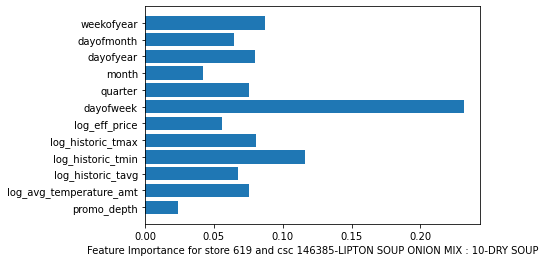

****
Processing store : 619 and csc : 146393
146393-S SEL BROTH CHICKN REDUCD SODIUM ASEPTIC 15-BOUILON BROTH
Length of train data :  797
Length of test data :  127
Best parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.5}
Lowest RMSE:  0.6613529169054189


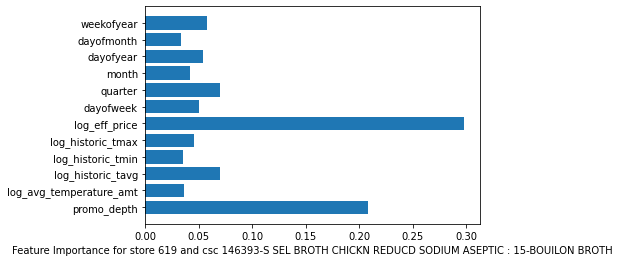

****
Processing store : 619 and csc : 146399
146399-S SEL BROTH CHICKEN ASEPTIC 15-BOUILON BROTH
Length of train data :  815
Length of test data :  174
Best parameters: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.4}
Lowest RMSE:  0.5827312054546584


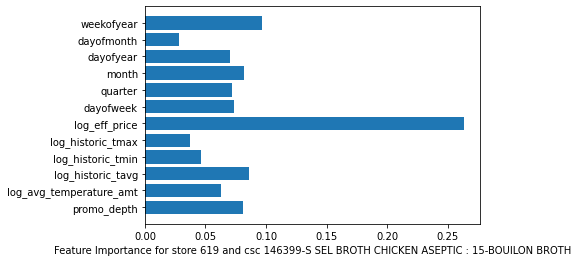

****
Processing store : 619 and csc : 146408
146408-PROGRESSO RTS SOUP CHICKEN NOODLE TRAD 20-READY TO SERVE SOUP
Length of train data :  733
Length of test data :  140
Best parameters: {'subsample': 0.6, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7}
Lowest RMSE:  0.8818222944149604


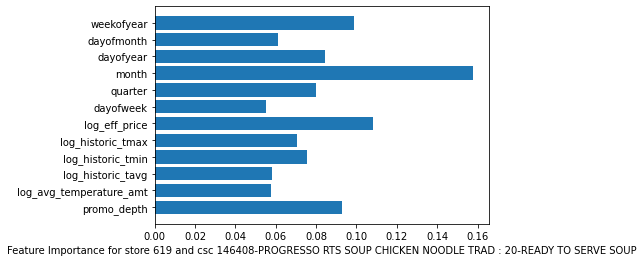

****
Processing store : 619 and csc : 146453
146453-PROGRESSO RCH & HRTY SOUP CHKN & NOODLE 20-READY TO SERVE SOUP
Length of train data :  684
Length of test data :  110
Best parameters: {'subsample': 0.7, 'n_estimators': 10, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8999999999999999}
Lowest RMSE:  0.9147786893632872


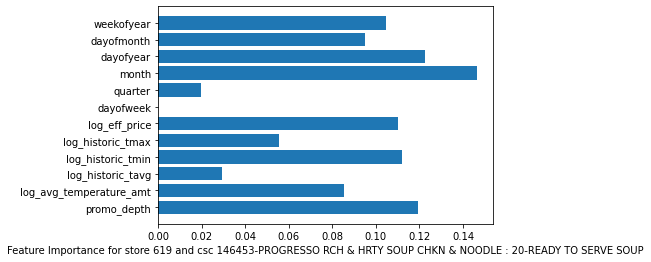

****
Processing store : 619 and csc : 146629
146629-CMPBL COND SOUP TOMATO 1-CONDENSED MULTI-SERVE EATING SOUP
Length of train data :  754
Length of test data :  157


In [ ]:
#val_wmape_list = []
#test_wmape_list = []
feature_importance_list = []
#df_val_actual_vs_predicted = pd.DataFrame()
df_test_actual_vs_predicted_xgbr = pd.DataFrame()
df_test_actual_vs_predicted_lgbmr = pd.DataFrame()
feature_importance_lgbmr_list = []

for e in unique_str_csc_list:

    store, csc = e[0], e[1]
    print(f"Processing store : {store} and csc : {csc}")

    csc_desc          = df_upc[df_upc['consumer_selling_cd'] == csc]['item_dsc'].values[0]
    smic_group_dsc    = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_group_dsc'].values[0]
    smic_group_cd     = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_group_cd'].values[0]
    smic_category_dsc = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_category_dsc'].values[0]
    smic_category_cd = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_category_cd'].values[0]
    smic_grp_info    = str(smic_group_cd) + '-' + smic_group_dsc
    smic_ctg_info    = str(smic_category_cd) + '-' + smic_category_dsc
    csc_info         = str(csc) + '-' + csc_desc
    print(csc_info, smic_ctg_info)

    print("Length of train data : ", len(df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]))
    print("Length of test data : ", len(df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]))
    #print("Length of val data : ", len(df_val[(df_val.store_id == store) & (df_val.consumer_selling_cd == csc)]))
    
    df_train_modified = df_train[(df_train.store_id == store) & (df_train.consumer_selling_cd == csc)]
    df_test_modified = df_test[(df_test.store_id == store) & (df_test.consumer_selling_cd == csc)]
    #df_val_modified = df_val[(df_val.store_id == store) & (df_val.consumer_selling_cd == csc)]

    train_indices = df_train_modified.index
    test_indices = df_test_modified.index
    #val_indices = df_val_modified.index

    X_train = df_train_modified[x_cols].values
    y_train = df_train_modified[y_col].values

    #X_val = df_val_modified[x_cols].values
    #y_val = df_val_modified[y_col].values

    X_test = df_test_modified[x_cols].values
    y_test = df_test_modified[y_col].values

    ### XGBoost ###
    #xgboost_reg_1 = xgboost.XGBRegressor(n_estimators=100, max_depth = 5)# for val
    xgboost_reg_2 = xgboost.XGBRegressor(seed=20, verbosity = 0)# for test
    '''
    xgboost_reg_1.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        early_stopping_rounds=50,
        verbose=False) 
    
    xgboost_reg_2.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False) 
    dmatrix = xgboost_reg_2.DMatrix(data=X_train, label=y_train)
    #params={'objective':'reg:squarederror'}
    '''
    params = { 'max_depth': [3, 5, 6, 10, 15, 20],
               'learning_rate': [.001, 0.01, 0.1, 0.2, 0.3],
               'subsample': np.arange(0.5, 1.0, 0.1),
               'colsample_bytree': np.arange(0.4, 1.0, 0.1),
               'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
               'n_estimators': [10, 50, 100, 500, 1000]
             }
    clf = RandomizedSearchCV(estimator=xgboost_reg_2,
                             param_distributions=params,
                             scoring='neg_mean_squared_error',
                             #loss = 'huber',
                             n_iter=25,
                             verbose=0)
    clf.fit(X_train, y_train)
    print("Best parameters:", clf.best_params_)
    print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))
    
    '''
    print("Feature importance for validation set of ", e)
    _ = plot_importance(xgboost_reg_1, height=0.9)
    print("Feature importance for test set of ", e)
    _ = plot_importance(xgboost_reg_2, height=0.9)
    y_val_predicted = xgboost_reg_1.predict(X_val)
    '''

    y_test_predicted = clf.predict(X_test)

    '''
    y_val_combined = pd.DataFrame(y_val, y_val_predicted).reset_index()
    y_val_combined.columns = ['y_val_actual', 'y_val_predicted']
    y_val_combined['store_id'] = store
    y_val_combined['csc'] = csc
    y_val_combined.index = val_indices
    val_wmape = weighted_mape(y_val_combined['y_val_actual'], y_val_combined['y_val_predicted']).numpy()
    print("Validation wmape :", val_wmape)
    print(y_val_combined)
    y_val_combined.to_csv('val_pred_' + "{}".format(store) + '_' + "{}".format(csc) + '.csv')
    val_wmape_list.append((store, csc, val_wmape))
    df_val_actual_vs_predicted = pd.concat([y_val_combined, df_val_actual_vs_predicted])
    '''
    y_test_combined = pd.DataFrame()
    y_test_combined = pd.DataFrame(y_test_predicted, y_test.ravel()).reset_index()
    y_test_combined.columns = ['y_test_actual', 'y_test_predicted']
    y_test_combined['store_id'] = store
    y_test_combined['csc'] = csc
    y_test_combined.index = test_indices

    #test_wmape = weighted_mape(y_test_combined['y_test_actual'], y_test_combined['y_test_predicted']).numpy()
    #print("Test wmape : ", test_wmape)
    
    store_csc_list = [store, csc, csc_info, smic_ctg_info]
    feature_importance_list.append(store_csc_list + list(clf.best_estimator_.feature_importances_))
    plt.barh(x_cols, clf.best_estimator_.feature_importances_)
    plt.xlabel("Feature Importance for store " + str(store) + " and csc " + csc_info + ' : ' + smic_ctg_info)
    plt.show(block = False)

    '''
    print(y_test)
    print("%%%%")
    print(y_test_predicted)
    print("*******************************")
    print(y_test_combined)
    y_test_combined.to_csv('test_pred_' + "{}".format(store) + '_' + "{}".format(csc) + '.csv')
    '''
    #test_wmape_list.append((store, csc_info + ' : ' + smic_ctg_info, test_wmape))
    
    df_test_actual_vs_predicted_xgbr = pd.concat([df_test_actual_vs_predicted_xgbr, y_test_combined])
    print("****")
    #print(df_test_actual_vs_predicted_xgbr)
    #print("^^^^^^^^^")

    '''
    #LighGBM
    gridParams = {
    'learning_rate': [0.05],
    'num_leaves': [90,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10],
    'metric':['auc']
    }
    lgbmr = lgb.LGBMRegressor()
    grid = RandomizedSearchCV(lgbmr,gridParams,verbose=1,n_jobs = -1,n_iter=10)
    grid.fit(X_train,y_train)
    print(grid.best_params_)
    y_pred_lgbmr = grid.predict(X_test)
    '''
    

In [ ]:
df_feature_importance = pd.DataFrame(feature_importance_list)
df_feature_importance.columns = ['store_id', 'csc', 'csc_info', 'smic_ctg_info'] + [col + '_feature_importance' for col in x_cols]
df_feature_importance

In [ ]:
df_feature_importance.sort_values(by = ['log_historic_tavg_feature_importance'], ascending = False)

In [ ]:
df_feature_importance[(df_feature_importance.store_id == 619) & (df_feature_importance.csc == 322045)].iloc[0]

In [ ]:
df_feature_importance[(df_feature_importance.store_id == 619) & (df_feature_importance.csc == 322087)].iloc[0]

In [ ]:
df_txn[df_txn.consumer_selling_cd == 461103]['smic_group_cd'].drop_duplicates()

In [ ]:
df_txn[df_txn.consumer_selling_cd == 322455]['smic_group_cd'].drop_duplicates()

In [ ]:
df_test_actual_vs_predicted_xgbr

In [ ]:
df_test_actual_vs_predicted_xgbr['y_test_actual_transformed'] = df_test_actual_vs_predicted_xgbr['y_test_actual'].apply(lambda x : np.round(np.exp(x) - 1))
df_test_actual_vs_predicted_xgbr['y_test_predicted_transformed'] = df_test_actual_vs_predicted_xgbr['y_test_predicted'].apply(lambda x : np.round(np.exp(x) - 1))
df_test_actual_vs_predicted_xgbr

In [ ]:
wmape_list = df_test_actual_vs_predicted_xgbr.groupby(['store_id','csc']).apply(lambda x: weighted_mape(x['y_test_actual_transformed'], x['y_test_predicted_transformed']))

In [ ]:
wmape_list = np.asarray(wmape_list)
wmape_list = [e.numpy() for e in wmape_list]
wmape_list

In [ ]:
df_kpi = df_test_actual_vs_predicted_xgbr[['store_id', 'csc']].drop_duplicates().reset_index().iloc[:,1:]
df_kpi['wmape'] = wmape_list
df_kpi['accuracy'] = 100 - df_kpi['wmape']
df_kpi.sort_values(by=['accuracy'], ascending = False)

In [ ]:
#df_test_wmape = pd.DataFrame(test_wmape_list, columns = ['store_id', 'csc', 'test_wmape'])
#df_test_wmape['test_accuracy'] = 100 - df_test_wmape['test_wmape']
#df_val_wmape = pd.DataFrame(val_wmape_list, columns = ['store_id', 'csc', 'val_wmape'])
#df_val_wmape['val_accuracy'] = 100 - df_val_wmape['val_wmape']

In [ ]:
#df_test_wmape.sort_values(by=['test_accuracy'], ascending = False)

In [ ]:
#df_val_wmape.sort_values(by=['val_accuracy'], ascending = False)

In [ ]:
np.exp(1.92986488)-1, np.exp(2.63905733)-1, np.log(5.88857942 + 1)

In [ ]:
df_test_actual_vs_predicted_xgbr[(df_test_actual_vs_predicted_xgbr.store_id == 619) & (df_test_actual_vs_predicted_xgbr.csc == 322087)].to_csv('619_322087.csv')

In [ ]:
df_test_actual_vs_predicted_xgbr[['store_id', 'csc', 'y_test_actual_transformed', 'y_test_predicted_transformed']].values.tolist()

In [ ]:
def wmape_test(actual, forecast):
    # we take two series and calculate an output a wmape from it

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

In [ ]:
df_test_actual_vs_predicted_xgbr[(df_test_actual_vs_predicted_xgbr.store_id == 326) & (df_test_actual_vs_predicted_xgbr.csc.isin([461103]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

In [ ]:
df_test_actual_vs_predicted_xgbr[(df_test_actual_vs_predicted_xgbr.store_id == 619) & (df_test_actual_vs_predicted_xgbr.csc.isin([322045]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

In [ ]:
df_test_actual_vs_predicted_xgbr[(df_test_actual_vs_predicted_xgbr.store_id == 619) & (df_test_actual_vs_predicted_xgbr.csc.isin([322087]))][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

In [ ]:
df_test_actual_vs_predicted_xgbr[(df_test_actual_vs_predicted_xgbr.store_id == 326) & (df_test_actual_vs_predicted_xgbr.csc == 461103)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

In [ ]:
df_test_actual_vs_predicted_xgbr[(df_test_actual_vs_predicted_xgbr.store_id == 619) & (df_test_actual_vs_predicted_xgbr.csc == 146385)][['y_test_actual_transformed','y_test_predicted_transformed']].plot(figsize=(30,8))

In [ ]:
df_txn[(df_txn.store_id == 619) & (df_txn.consumer_selling_cd == 146385) & (df_txn.txn_dte == '2022-05-01')].iloc[0]

In [ ]:
orig_df_weather_txn_combined.loc[['2022-05-01']].iloc[0]

In [ ]:
df_test[(df_test.store_id == 619) & (df_test.consumer_selling_cd == 146385)]

# ***Aggregate Forecast to Week Level***

In [ ]:
df_fcst_actual_week = pd.merge(df_test_actual_vs_predicted_xgbr.reset_index(), df_day_week, how = 'inner', left_on = 'day_dt', right_on = 'date_val')

In [ ]:
df_fcst_actual_week.columns

In [ ]:
df_fcst_actual_week.iloc[0]

In [ ]:
df_fcst_actual_week_refined = df_fcst_actual_week[['store_id', 'csc', 'day_dt', 'y_test_actual_transformed', 'y_test_predicted_transformed', 'week_start_date', 'week_end_date']]

In [ ]:
df_fcst_actual_week_refined.iloc[0]

In [ ]:
df_test_act_vs_pred_wkly = df_fcst_actual_week_refined.groupby(['store_id', 'csc', 'week_start_date', 'week_end_date']).agg({'y_test_actual_transformed' : np.sum, 'y_test_predicted_transformed' : np.sum}).reset_index()

In [ ]:
df_test_act_vs_pred_wkly

In [ ]:
df_kpi_wkly = df_test_act_vs_pred_wkly[['store_id', 'csc']].drop_duplicates()
wkly_wmape_list = df_test_act_vs_pred_wkly.groupby(['store_id','csc']).apply(lambda x: weighted_mape(x['y_test_actual_transformed'], x['y_test_predicted_transformed']))

wkly_wmape_list = np.asarray(wkly_wmape_list)
wkly_wmape_list = [e.numpy() for e in wkly_wmape_list]
wkly_wmape_list

df_kpi_wkly['wmape_wkly'] = wkly_wmape_list
df_kpi_wkly['accuracy_wkly'] = 100 - df_kpi_wkly['wmape_wkly']
df_kpi_wkly.sort_values(by=['accuracy_wkly'], ascending = False, inplace = True)
df_kpi_wkly

In [ ]:
df_wkly = pd.merge(df_test_act_vs_pred_wkly, df_wkly_weather_stats, how = 'inner', on = ['week_start_date', 'week_end_date'])
df_wkly = pd.merge(df_wkly, df_upc[['consumer_selling_cd', 'item_dsc', 'smic_group_cd', 'smic_group_dsc', 'smic_category_cd', 'smic_category_dsc']], how = 'inner', left_on = 'csc', right_on = 'consumer_selling_cd')
df_wkly.drop(columns = ['consumer_selling_cd'], inplace = True)
df_wkly.set_index(['week_end_date'], inplace = True)
df_wkly.iloc[0]

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(200, 100), dpi=80)

df_wkly[(df_wkly.store_id == 326) & (df_wkly.csc == 146399)][['y_test_actual_transformed', 'y_test_predicted_transformed', 'wkly_avg_high_temperature_amt', 'wkly_avg_low_temperature_amt', 'wkly_avg_temperature_amt']].plot()
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
figure(figsize=(200, 100), dpi=80)
df_wkly[(df_wkly.store_id == 619) & (df_wkly.csc == 146385)][['y_test_actual_transformed', 'y_test_predicted_transformed', 'wkly_avg_high_temperature_amt', 'wkly_avg_low_temperature_amt', 'wkly_avg_temperature_amt']].plot()
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
figure(figsize=(100, 100), dpi=80)
df_wkly[(df_wkly.store_id == 326) & (df_wkly.csc == 461103)][['y_test_actual_transformed', 'y_test_predicted_transformed', 'wkly_avg_high_temperature_amt', 'wkly_avg_low_temperature_amt', 'wkly_avg_temperature_amt']].plot()
plt.legend(bbox_to_anchor=(1.1, 1.05))

In [ ]:
for e in df_wkly[['store_id', 'csc']].drop_duplicates().values:
    store_id = e[0]
    csc = e[1]
    csc_desc          = df_upc[df_upc['consumer_selling_cd'] == csc]['item_dsc'].values[0]
    smic_group_dsc    = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_group_dsc'].values[0]
    smic_group_cd     = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_group_cd'].values[0]
    smic_category_dsc = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_category_dsc'].values[0]
    smic_category_cd = df_upc[df_upc['consumer_selling_cd'] == csc]['smic_category_cd'].values[0]
    smic_grp_info    = str(smic_group_cd) + '-' + smic_group_dsc
    smic_ctg_info    = str(smic_category_cd) + '-' + smic_category_dsc
    csc_info         = str(csc) + '-' + csc_desc
    accuracy = df_kpi_wkly[(df_kpi_wkly.store_id == store_id) & (df_kpi_wkly.csc == csc)]['accuracy_wkly'].values[0]
    #print(store_id, csc_info, smic_ctg_info)
    
    #plt.figure(figsize=(200, 100))
    df_wkly[(df_wkly.store_id == store_id) & (df_wkly.csc == csc)][['y_test_actual_transformed', 'y_test_predicted_transformed', 'wkly_avg_high_temperature_amt', 'wkly_avg_low_temperature_amt', 'wkly_avg_temperature_amt']].plot(figsize=(10, 8))
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    title_string = f"Weekly Forecast Vs Actual along with Weather for store {store_id.astype(str).zfill(5)} and csc {csc_info}, {smic_grp_info}"
    subtitle_string = f"Forecast accuracy at store-csc-week level {np.round(accuracy)}%"
    plt.suptitle(title_string, y=1.05, fontsize=18)
    plt.title(subtitle_string, y=1.05, fontsize=16)
    plt.show(block = False)
    plt.savefig('plot_'+ str(store_id).zfill(5) + '_csc_' + str(csc) + '.png')


# ***End of my experimentation***